## <font color='lightblue'> <h1><b>Desafio  Final:</b> "Análisis de la Demanda de Energía Eléctrica en Londres"</h1> </font>
## </h3> Mediciones obtenidas a partir de SmartMeters de Londres </h3>
<h3><blockquote>
        <ul>
          <li>Análisis de demanda y patrones de consumo </li>
          <li>Identificación de features representativas del comportamiento de la demanda </li>
          <li>Análisis de la demanda como serie de tiempo en modelos predictivos </li>
        </ul>
</blockquote>

<img src=https://electricallive.com/wp-content/uploads/2018/04/Introduction-And-Importance-To-Electrical-Energy.jpg>

 <font color='lightgreen'> <h2><b>Grupo 5</b></h2> </font>
<blockquote>
        <ul>
          <li>Panizza, Camila</li>
          <li>Ron, Juan Ignacio</li>
          <li>Sirai, Juan Bautista</li>
        </ul>
</blockquote>

<a id="section_toc"></a> 
##### <font color='lightgreen'> <h2><b> Contenidos</b></h2> </font>

[1- Intro](#section_intro)

[2- Carga de Datos](#section_carga_datasets)

[3- Data Wrangling](#section_data_wrangling)

$\hspace{.5cm}$[3.1- Transformaciones sobre Weather](#section_df_weather)

$\hspace{.5cm}$[3.2- Transformaciones sobre Energy](#section_df_energy)

$\hspace{.5cm}$[3.3- Transformaciones sobre Medidores](#section_df_clientes)

$\hspace{.5cm}$[3.4- Transformaciones sobre Holidays](#section_df_holidays)

$\hspace{.5cm}$[3.5- Uniones de DataSets](#section_df_merge)

[4- Análisis Exploratorio](#section_analisis_exploratorio)

[5- Problema 1: Estimación de Demanda Mediano / Largo Plazo](#section_modelado)

$\hspace{.5cm}$[5.1- Modelo Lineal](#section_tendencia_lineal)

$\hspace{.5cm}$[5.2- Modelo con trasformación Logarítmica](#section_logaritmica)

$\hspace{.5cm}$[5.3- Modelo con trasformación Logarítmica y Estacionalidad Mensual](#section_logaritmica_estacional)

$\hspace{.5cm}$[5.4- Modelo con trasformación Logarítmica y Estacionalidad Mensual y Condiciones Climaticas](#section_clima)

$\hspace{.5cm}$[5.5- Analisis de Residuos](#section_residuos)

$\hspace{.5cm}$[5.6- Modelo ARIMA](#section_arima)

$\hspace{.5cm}$[5.7- BONUS](#section_bonus)

$\hspace{1.0cm}$[5.7.1- Time Series Split](#section_time_series)

$\hspace{1.0cm}$[5.7.2- Datos de Panel](#section_panel)

---

<a id="section_intro"></a> 

# <font color='skyblue'>Intro. </font>
## Descripción del problema
Trabajaremos sobre un Dataset de **consumo de energía eléctrica** de la ciudad de **Londres**.

Para seguir mejor el consumo de energía, el gobierno de UK quiere que las empresas prestatarias del servicio eléctrico instalen **medidores inteligentes** en todos los hogares de Inglaterra, Gales y Escocia. El objetivo es que cada uno de los 26 millones de hogares, tenga instalado un Medidor Inteligente (indistintamente lo denominaremos como SmartMeter)

Esta iniciativa, está enmarcada en un conjunto de acciones liderada por la **Union Europea** para hacer un uso más eficiente de energía y combatir el cambio climático.

A partir de allí, hemos decidido plantear dos problemas de distinta naturaleza, y en consecuencia, de distinto abordaje:
* ``Problema Económico/Financiero``: Sin entrar en detalles de cómo está organizado el Mercado Electrico Mayorista, las empresas prestatarias del servicio de energía eléctrica operan como Distribuidoras, esto quiere decir que compran energía a un precio determinado para luego venderla a los usuarios, contemplando un Valor Agregado de Distribución que deberá tanto cubrir los costos de operación, cómo asegurar una determinada rentabilidad. De allí se desprende que **predecir la Demanda de Energía a mediano y largo plazo**, es crucial para cualquier distribuidora, ya que es la principal fuente de ingresos y en consecuencia el punto de partida para poder elaborar sus presupuestos y planes de inversiones. Por tratarse de un problema a largo plazo, y que de haber tenido un dataset más amplio podríamos haber llegado a captar mayores componentes de tendencia, esta problemática la analizaremos mediante modelos de Series Temporales.

* ``Problema Técnico``: Dejemos por un momento de lado el aspecto financiero del negocio, e imaginemos que somos Jefes de un área operativa: ¿No sería fantástico poder planificar nuestras tareas de mantenimiento preventivo sobre la red eléctrica, en función de una **estimación de la demanda puntual**?. Por ejemplo, podríamos evaluar el impacto de cada corte programado de nuestro servicio, en función al consumo que habrá en determinada zona, en función de las características de los consumidores, clima, día, horario y época del año... incluso tendríamos menos usuarios furiosos por quedarse sin servicio en su pico de consumo! Este segundo problema, más focalizado en en corto plazo, y tomando unas características particulares de los consumidores, lo trabajaremos con un modelo de predicción puntual.

### Campos de Daily Dataset
En este conjunto de datos, encontraremos una versión refactorizada de los datos de Londres, que contiene las lecturas de consumo de energía de una muestra de 5.567 hogares londinenses que participaron en el proyecto Low Carbon London liderado por UK Power Networks entre noviembre de 2011 y febrero. 2014. 

* ``LCLid``: Identificador único del punto de medición.
* ``day``: día de la medición.
* ``energy_median``:mediana del consumo por hora.
* ``energy_mean``:promedio de consumo por hora.
* ``energy_max``: máximo de energía consumida en ese día.
* ``energy_count``: cantidad de mediciones
* ``energy_std``: desvío estandar del consumo diario por hora
* ``energy_sum``: total consumido en kWh en el día.
* ``energy_min`` : mínimo de energía consumida en ese día.

### Campos de Informations Households
* ``LCLid``: Identificador único del punto de medición.
* ``day``: día de la medición.
* ``stdor / ToU``: Tarifa estándar o por hora de uso (Time of Use).
* ``Acorn``: Es una segmentación geodemográfica para residentes de UK. Clasifican cada codigo postal del país en 62 categorías, las cuales se pueden resumir en 18 grupos, que pueden a su vez englobarse dentro de 6 categorías mayores.
* ``Acorn Grouped``: categoría mayor a la que corresponde cada Acorn.
* ``file``: refiere al Block (o manzana) a la cual pertenece

|Acorn Grouped|Acorn|Population (2013)| % Total|
|-------------|-----|-----------------|--------|
|Affluent Achievers|Lavish Lifestyles|820,947|1.3%|
|           |Executive Wealth|7,788,972|12.1%|
|           |Mature Money|5,663,939|8.8%|
|Rising Prosperity| City Sophisticates|2,024,721|3.2%|
|                 |Career Climbers|3,579,716|5.6%|
|Comfortable Communities|Countryside Communities|4,160,615|6.5%|
|                       |Successful Suburbs|3,844,002|6.0%|
|                       |Steady Neighbourhoods|5,376,958|8.4%|
|                       |Comfortable Seniors|1,645,668|2.6%|
|                       |Starting Out|2,569,813|4.0%|
|Financially Stretched|Student Life|1,550,112|2.4%|
|                     |Modest Means|5,078,729|7.9%|
|                     |Striving Families|5,564,601|8.7%|
|                     |Poorer Pensioners|3,128,512|4.9%|
|Urban Adversity|Young Hardship|3,222,867|5.0%|
|               |Struggling Estates|4,730,766|7.4%|
|               |Difficult Circumstances|2,962,375|4.6%|
|Not Private Households|Not Private Households|550,486|0.9%|
|``TOTAL``| |``64,263,799``|``100%``|

### Campos de Informations Weather (solo principales)
* ``temperaturelow/min/high/Max``: Temperatura
* ``windBearing``: Dirección del viento.
* ``dewPoint``: Concepto relacionado con humedad. Temperatura a la que se debe enfriar el aire para lograr una humedad del 100%
* ``cloudCover``: Nubosidad
* ``windSpeed``: Velocidad del viento
* ``pressure``: Presion 
* ``apparentTemperatureHigh/low/max``: Sensación térmica
* ``visibility``: Visibilidad
* ``uvIndex``: indice UV
* ``moonPhase``: Fase Lunar
    
### Campos de UK Bank Holidays
* ``Bank holiday``: Fecha de feriado
* ``type``:  Descripción de feriado.



# <font color='skyblue'> Carga de Librerias</font>

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, confusion_matrix, classification_report, accuracy_score
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist,squareform

from sklearn.pipeline import Pipeline, make_pipeline, make_union, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from statistics import mode

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer




##########
import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn-bright')

<a id="section_carga_datasets"></a> 

# <font color='skyblue'> Carga de DataSets</font>

[Volver](#section_toc)

#### <font color='orange'> El primer dataset que cargaremos, es sobre mediciones diarias de consumo de energía eléctrica en la ciudad de Londres, desde el 2011 hasta el 2014. El mismo se encuentra individualizado por medidor </font>


In [4]:
# Dataset de Mediciones Diarias por manzana y medidor
energy = pd.read_csv('data/daily_dataset.csv/daily_dataset.csv')
print('\x1b[1;31m' +'Dataset Daily Demand'+'\x1b[0m')
print('Shape inicial ', energy.shape)
print('Valores nulos en el dataset: ')
energy.isnull().sum()

Dataset Daily Demand
Shape inicial  (3510433, 9)
Valores nulos en el dataset: 


LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [5]:
energy.dropna(subset=['energy_sum'], axis=0, inplace=True)

In [6]:
print('\x1b[1;31m' +'Dataset Daily Demand'+'\x1b[0m')
print('Shape inicial ', energy.shape)
print('Valores nulos en el dataset: ')
energy.isnull().sum()

Dataset Daily Demand
Shape inicial  (3510403, 9)
Valores nulos en el dataset: 


LCLid                0
day                  0
energy_median        0
energy_mean          0
energy_max           0
energy_count         0
energy_std       11301
energy_sum           0
energy_min           0
dtype: int64

In [7]:
print('\x1b[1;31m'+'Muestra de los primeros 5 registros'+'\x1b[0m')
display(energy.sample(5))
print('----------------------------------------------')
print('\x1b[1;31m'+'Tipo de datos'+'\x1b[0m');
display(energy.info());

Muestra de los primeros 5 registros


LCLid         day  energy_median  energy_mean  energy_max  \
123898   MAC005388  2013-10-15         0.1055     0.482042       4.459   
957495   MAC004596  2013-10-08         0.0930     0.093646       0.202   
1280078  MAC004909  2013-04-02         0.4395     0.573062       1.566   
320065   MAC000049  2013-12-21         0.6665     0.717875       2.035   
3130026  MAC000337  2013-04-26         0.0620     0.062667       0.172   

         energy_count  energy_std  energy_sum  energy_min  
123898             48    0.784072      23.138       0.006  
957495             48    0.051024       4.495       0.023  
1280078            48    0.499191      27.507       0.033  
320065             48    0.509433      34.458       0.150  
3130026            48    0.041808       3.008       0.000

----------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3510403 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 267.8+ MB


None

#### <font color='orange'>A continuación, realizaremos la carga del dataset que nos proporciona información relativa a cada suministro (o punto de medición)</font>


In [8]:
# Dataset de información por cada medidor
info_df = pd.read_csv('data/informations_households.csv')
print('\x1b[1;31m' +'Dataset Información Básica de cada Medidor'+'\x1b[0m')
print('Shape inicial ', info_df.shape)
print('Valores nulos en el dataset: ')
info_df.isnull().sum()

Dataset Información Básica de cada Medidor
Shape inicial  (5566, 5)
Valores nulos en el dataset: 


LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

In [9]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(info_df.sample(5))
print('----------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos del DataFrame'+'\x1b[0m')
print(info_df.info())

Muestra de los primeros 5 registros


LCLid stdorToU    Acorn Acorn_grouped      file
4515  MAC000491      Std  ACORN-O     Adversity  block_90
4718  MAC005401      ToU  ACORN-Q     Adversity  block_94
2919  MAC001881      Std  ACORN-G   Comfortable  block_58
3814  MAC002368      Std  ACORN-K     Adversity  block_76
2472  MAC003893      Std  ACORN-F   Comfortable  block_49

----------------------------------------------
Tipo de datos del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None


#### <font color='orange'>Cargamos DataFrame con condiciones climáticas para el período de referencia</font>


In [10]:
# Dataset de climas

weather= pd.read_csv('data/weather_daily_darksky.csv')
print('\x1b[1;31m' +'Dataset Temperaturas Diarias Londres'+'\x1b[0m')
print('Shape inicial ', weather.shape)
print('Valores nulos en el dataset: ')
print(weather.isnull().sum())


Dataset Temperaturas Diarias Londres
Shape inicial  (882, 32)
Valores nulos en el dataset: 
temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime                    1
summary                        0
temperatureLowTim

In [11]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(weather.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(weather.info())

Muestra de los primeros 5 registros


temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  vis

#### <font color='orange'>Cargamos DataFrame con los feriados bancarios para el período de referencia</font>



In [12]:
# Dataset de feriados bancarios

holidays= pd.read_csv('data/uk_bank_holidays.csv')
print('\x1b[1;31m' +'Dataset Feriados UK'+'\x1b[0m')
print('Shape inicial ', holidays.shape)
print('Valores nulos en el dataset: ')
holidays.isnull().sum()

Dataset Feriados UK
Shape inicial  (25, 2)
Valores nulos en el dataset: 


Bank holidays    0
Type             0
dtype: int64

In [13]:
print('\x1b[1;31m' +'Muestra de los primeros 5 registros'+'\x1b[0m')
display(holidays.head(5))
print('------------------------------------------------------------')
print('\x1b[1;31m' +'Tipo de datos'+'\x1b[0m')
print(holidays.info())

Muestra de los primeros 5 registros


Bank holidays                                          Type
0    2012-12-26                                    Boxing Day
1    2012-12-25                                 Christmas Day
2    2012-08-27                           Summer bank holiday
3    2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4    2012-04-06          Spring bank holiday (substitute day)

------------------------------------------------------------
Tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bank holidays  25 non-null     object
 1   Type           25 non-null     object
dtypes: object(2)
memory usage: 528.0+ bytes
None


<a id="section_data_wrangling"></a> 
# <font color='lightblue'> Data Wrangling </font>
[Volver](#section_toc)

<a id="section_df_weather"></a> 
#### <font color='orange'> Transformaciones sobre DF Weather</font>

In [14]:
#Convertimos variables a formato DateTime

weather['day']=  pd.to_datetime(weather['time'])

In [15]:
# Me quedo con las variables más interesantes y completo los NA con Bfill (tener en cuenta que era 1 registro faltante en enero de 2014, de nubosidad)

weather.fillna(axis=0, method='bfill', inplace=True )
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather["temperatureMean"]=(weather["temperatureMax"]+weather["temperatureMin"])/2
weather["apparent_temperatureMean"]=(weather["apparentTemperatureMax"]+weather["apparentTemperatureMin"])/2

In [16]:
weather.sample(5)

temperatureMax  windBearing  dewPoint  cloudCover  windSpeed  pressure  \
673           29.20          187     13.56        0.46       0.48   1022.88   
739           10.54          217      4.14        0.47       5.95   1005.47   
6             13.19          117      8.12        0.26       2.37   1016.80   
843           15.37           53      4.86        0.14       1.97   1032.22   
564           24.32           42     13.13        0.38       2.65   1018.33   

     apparentTemperatureHigh  visibility  humidity  apparentTemperatureLow  \
673                    29.20       14.87      0.56                   17.14   
739                     5.49       11.91      0.84                    5.49   
6                      13.19        6.63      0.92                    4.76   
843                    15.37        6.53      0.78                    3.94   
564                    24.32       11.27      0.69                   12.82   

     apparentTemperatureMax  uvIndex  temperatureLow  temperatureMin  \
673                   29.20      5.0           17.14           17.03   
739                   10.54      1.0            9.34            3.02   
6                     13.19      1.0            4.76            7.48   
843                   15.37      3.0            3.94            3.73   
564                   24.32      4.0           12.82           16.37   

     temperatureHigh  apparentTemperatureMin  moonPhase                 day  \
673            29.20                   17.03       0.27 2013-07-15 23:00:00   
739             9.34                   -0.68       0.54 2013-01-28 00:00:00   
6              13.19                    5.98       0.79 2011-11-19 00:00:00   
843            15.37                    2.01       0.37 2014-03-12 00:00:00   
564            24.32                   16.37       0.69 2013-08-25 23:00:00   

     temperatureMean  apparent_temperatureMean  
673           23.115                    23.115  
739            6.780                     4.930  
6             10.335                     9.585  
843            9.550                     8.690  
564           20.345                    20.345

<a id="section_df_energy"></a> 
#### <font color='orange'> Transformaciones sobre DF Energy</font>

In [17]:
# Asimismo, desagregamos la información relativa a las fechas y ordenamos

energy['day'] = pd.to_datetime(energy['day'])
energy['year'] = energy['day'].dt.year
energy['month'] = energy['day'].dt.month
energy['dayofweek'] = energy['day'].dt.dayofweek
energy['day_name'] = energy['day'].dt.day_name()
energy = energy.sort_values(by='day')

In [18]:
energy.sample(5)

LCLid        day  energy_median  energy_mean  energy_max  \
3158983  MAC000133 2013-10-13         0.4135     0.740750       3.843   
1519947  MAC001947 2014-02-06         0.1205     0.231958       0.580   
1512623  MAC005172 2013-03-17         0.1130     0.206896       1.181   
2031486  MAC004928 2013-07-19         0.0590     0.057958       0.103   
2822517  MAC000315 2012-11-17         0.0485     0.101021       0.387   

         energy_count  energy_std  energy_sum  energy_min  year  month  \
3158983            48    0.831622      35.556       0.112  2013     10   
1519947            48    0.149195      11.134       0.108  2014      2   
1512623            48    0.271189       9.931       0.034  2013      3   
2031486            48    0.016220       2.782       0.036  2013      7   
2822517            48    0.114061       4.849       0.008  2012     11   

         dayofweek  day_name  
3158983          6    Sunday  
1519947          3  Thursday  
1512623          6    Sunday  
2031486          4    Friday  
2822517          5  Saturday

<a id="section_df_clientes"></a> 
#### <font color='orange'> Transformaciones sobre DF Medidores</font>

In [19]:
# En el df de datos del cliente, cambiamos el nombre a la columna 'file' por 'block', por ser potencialmente útil para los modelos

info_df = info_df.rename(columns = {'file' : 'block'})
info_df.sample(5)

LCLid stdorToU    Acorn Acorn_grouped      block
2624  MAC005425      Std  ACORN-F   Comfortable   block_52
5516  MAC000318      Std  ACORN-Q     Adversity  block_110
1429  MAC004877      Std  ACORN-E      Affluent   block_28
5085  MAC004183      Std  ACORN-Q     Adversity  block_101
4342  MAC002488      ToU  ACORN-N     Adversity   block_86

In [20]:
# Vemos que hay solo dos Medidores con Acorn-. Suponemos que es un error de tipeo. Por no tener mayor certeza a cual corresponde, los excluiremos del análisis
info_df.loc[info_df['Acorn']=='ACORN-',"LCLid"].value_counts()

MAC005492    1
MAC001074    1
Name: LCLid, dtype: int64

In [21]:
#Nos quedamos con los registros que no pertenecen a Acorn-
info_df = info_df.loc[(info_df['LCLid']!='MAC005492') & (info_df['LCLid']!='MAC001074')]
info_df.Acorn.value_counts()

ACORN-E    1567
ACORN-Q     831
ACORN-F     684
ACORN-H     455
ACORN-L     342
ACORN-D     292
ACORN-G     205
ACORN-K     165
ACORN-A     157
ACORN-N     152
ACORN-C     151
ACORN-M     113
ACORN-J     112
ACORN-P     110
ACORN-O     103
ACORN-I      51
ACORN-U      49
ACORN-B      25
Name: Acorn, dtype: int64

In [22]:
# Modificamos la columna 'Acorn_grouped' para que coincida con la escala real (la que viene fue creada por quien compiló los dfs)

affluent_mask = (info_df['Acorn'] == 'ACORN-A') | (info_df['Acorn'] == 'ACORN-B') | (info_df['Acorn'] == 'ACORN-C')
rising_mask = (info_df['Acorn'] == 'ACORN-D') | (info_df['Acorn'] == 'ACORN-E')
confortable_mask = (info_df['Acorn'] == 'ACORN-F') | (info_df['Acorn'] == 'ACORN-G') | (info_df['Acorn'] == 'ACORN-H') | (info_df['Acorn'] == 'ACORN-I') | (info_df['Acorn'] == 'ACORN-J')
streched_mask = (info_df['Acorn'] == 'ACORN-K') | (info_df['Acorn'] == 'ACORN-L') | (info_df['Acorn'] == 'ACORN-M') | (info_df['Acorn'] == 'ACORN-N')
adversity_mask = (info_df['Acorn'] == 'ACORN-O') | (info_df['Acorn'] == 'ACORN-P') | (info_df['Acorn'] == 'ACORN-Q')
household_mask = (info_df['Acorn'] == 'ACORN-U')

In [23]:
info_df.loc[affluent_mask,'Acorn_grouped'] = 'Affluent'
info_df.loc[rising_mask,'Acorn_grouped'] = 'Rising'
info_df.loc[confortable_mask,'Acorn_grouped'] = 'Comfortable'
info_df.loc[streched_mask,'Acorn_grouped'] = 'Stretched'
info_df.loc[adversity_mask,'Acorn_grouped'] = 'Adversity'
info_df.loc[household_mask ,'Acorn_grouped'] = 'NP_Household'

<a id="section_df_holidays"></a> 
#### <font color='orange'> Transformaciones sobre DF Holidays</font>

In [24]:
# Pasamos la columna 'Bank holidays' a formato fecha y la seteamos como índice

holidays['date']=  pd.to_datetime(holidays['Bank holidays'])
holidays = holidays.set_index(holidays['date'], drop = True)

<a id="section_df_merge"></a> 
#### <font color='orange'> Uniones entre Datasets</font>

In [25]:
# Merge con DF Medidores

df_energy = energy.merge(info_df, how='left',left_on="LCLid",right_on="LCLid")

print('Corroboramos no haber perdido registros durante el shape')
display(energy.shape,df_energy.shape)
print(df_energy.isnull().sum()/df_energy.shape[0])

Corroboramos no haber perdido registros durante el shape


(3510403, 13)

(3510403, 17)

LCLid            0.000000
day              0.000000
energy_median    0.000000
energy_mean      0.000000
energy_max       0.000000
energy_count     0.000000
energy_std       0.003219
energy_sum       0.000000
energy_min       0.000000
year             0.000000
month            0.000000
dayofweek        0.000000
day_name         0.000000
stdorToU         0.000222
Acorn            0.000222
Acorn_grouped    0.000222
block            0.000222
dtype: float64


In [26]:
df_energy.sample(5)

LCLid        day  energy_median  energy_mean  energy_max  \
1490673  MAC000878 2013-02-09         0.2465     0.363979       1.955   
493203   MAC001042 2012-08-04         0.0735     0.079979       0.243   
1176856  MAC005223 2012-12-14         0.1890     0.205458       0.635   
639334   MAC005498 2012-09-03         0.0275     0.037500       0.156   
961974   MAC003260 2012-11-05         0.2330     0.374229       1.150   

         energy_count  energy_std  energy_sum  energy_min  year  month  \
1490673            48    0.370587      17.471       0.031  2013      2   
493203             48    0.049632       3.839       0.018  2012      8   
1176856            48    0.120240       9.862       0.059  2012     12   
639334             48    0.036791       1.800       0.001  2012      9   
961974             48    0.298698      17.963       0.067  2012     11   

         dayofweek  day_name stdorToU    Acorn Acorn_grouped     block  
1490673          5  Saturday      ToU  ACORN-E        Rising  block_17  
493203           5  Saturday      Std  ACORN-E        Rising  block_36  
1176856          4    Friday      Std  ACORN-E        Rising  block_27  
639334           0    Monday      ToU  ACORN-L     Stretched  block_82  
961974           0    Monday      Std  ACORN-C      Affluent   block_5

In [27]:
# En el df de clima, la columna 'day' tiene registros con valor de hora que al truncar genera duplicados. Redondeamos al día más cercano.

weather['day'] = weather['day'].apply(lambda x: x.round('1d'))

In [28]:
# Merge FINAL

df_energy_join = df_energy.set_index('day')
weather_join = weather.set_index('day')
df_final =  df_energy_join.join(weather_join, on='day', how = 'left').reset_index()
#df_final =  df_energy.merge(weather, on='day')
print('Corroboramos no haber perdido registros durante el shape')
display(energy.shape, df_final.shape)
print(df_final.isnull().sum()/df_final.shape[0])

Corroboramos no haber perdido registros durante el shape


(3510403, 13)

(3510403, 36)

day                         0.000000
LCLid                       0.000000
energy_median               0.000000
energy_mean                 0.000000
energy_max                  0.000000
energy_count                0.000000
energy_std                  0.003219
energy_sum                  0.000000
energy_min                  0.000000
year                        0.000000
month                       0.000000
dayofweek                   0.000000
day_name                    0.000000
stdorToU                    0.000222
Acorn                       0.000222
Acorn_grouped               0.000222
block                       0.000222
temperatureMax              0.000000
windBearing                 0.000000
dewPoint                    0.000000
cloudCover                  0.000000
windSpeed                   0.000000
pressure                    0.000000
apparentTemperatureHigh     0.000000
visibility                  0.000000
humidity                    0.000000
apparentTemperatureLow      0.000000
a

<a id="section_analisis_exploratorio"></a> 
# <font color='lightblue'> Análisis Explotarorio de Datos </font>
[Volver](#section_toc)

* Debido a que el proyecto de SmartMeters se implementó de manera paulatina en la ciudad de Londres, la distribución de mediciones no se reparte de manera homogenea durante el período de referencia.
* Es asi como durante los primeros años de análisis, la cantidad de mediciones fue muy baja alcanzando una estabilidad recién entre fines de 2013 y 2014.

''

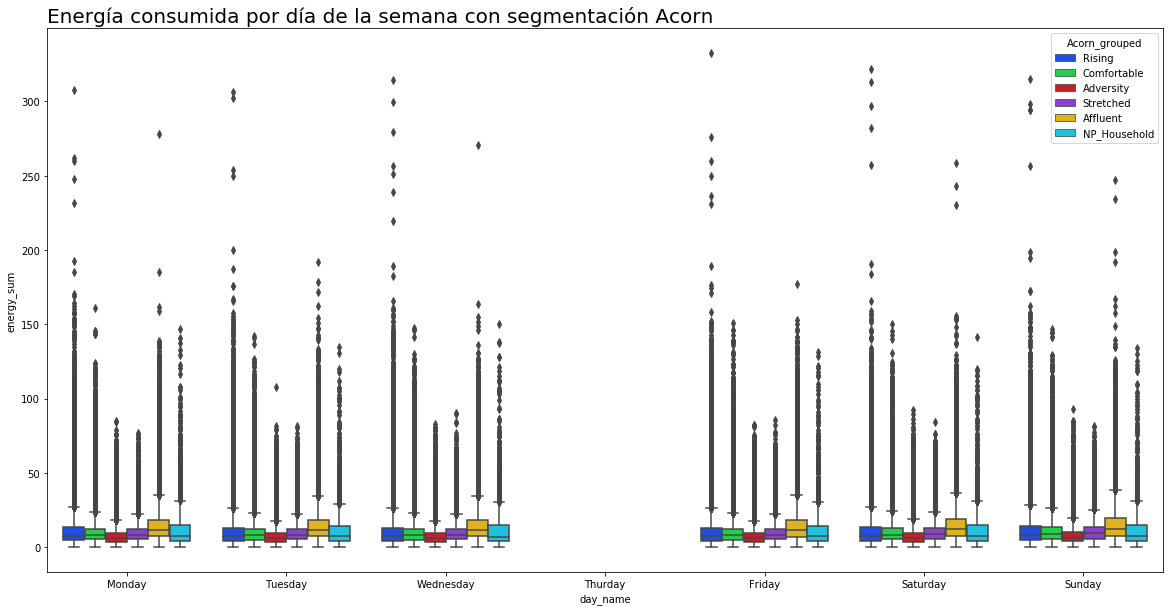

In [29]:

plt.figure(figsize=(20,10))
plt.title('Energía consumida por día de la semana con segmentación Acorn',size=20, loc='left')
sns.boxplot(x="day_name", y="energy_sum",
            hue="Acorn_grouped",
            data=df_final,
            order=["Monday", "Tuesday", "Wednesday", "Thurday", "Friday", "Saturday", "Sunday"])
;

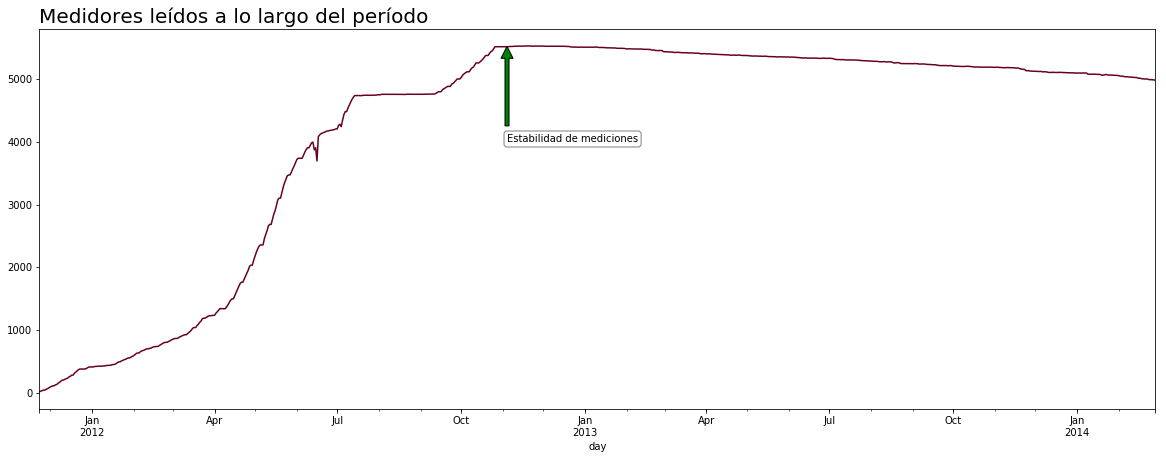

In [30]:

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Medidores leídos a lo largo del período', size=20, loc='left')
df_final.groupby('day')['LCLid'].count().plot(figsize=(20,7),colormap='RdGy')
ax.annotate("Estabilidad de mediciones", xy=('2012-11-4',5600), xytext=('2012-11-4',4000),
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            arrowprops=dict(facecolor='green', shrink=0.05));



Para que el análisis de los patrones de consumo no se vea afectado por cuestiones relativas a la cantidad de mediciones, utilizaremos para esta sección un sub dataset agrupado por Día, Acorn y Tarifa, **promediando la feature energy_sum** por la cantidad de observaciones de cada categoría, y dejaremos de lado el análisis de la demanda agregada.

In [31]:
group=df_final.groupby(['day','Acorn_grouped','Acorn','stdorToU'])[['energy_sum',\
                        'temperatureMean','apparentTemperatureMin',"apparent_temperatureMean",\
                        'humidity','visibility','cloudCover','pressure',\
                         'uvIndex','dewPoint']].agg({'energy_sum':'mean','temperatureMean':'mean',\
                        'humidity':'mean','visibility':'mean','cloudCover':'mean',\
                        "apparent_temperatureMean":'mean','pressure':'mean',\
                        'uvIndex':'mean','dewPoint':'mean','apparentTemperatureMin':'mean' })

In [32]:
df_grouped=pd.DataFrame(group)
df_grouped.reset_index(inplace=True)
df_grouped.head()

day Acorn_grouped    Acorn stdorToU  energy_sum  temperatureMean  \
0 2011-11-23     Adversity  ACORN-Q      Std     5.79800            7.085   
1 2011-11-23   Comfortable  ACORN-F      Std     4.76125            7.085   
2 2011-11-23   Comfortable  ACORN-F      ToU     3.03600            7.085   
3 2011-11-23   Comfortable  ACORN-G      Std     5.34050            7.085   
4 2011-11-23        Rising  ACORN-D      Std     9.28100            7.085   

   humidity  visibility  cloudCover  apparent_temperatureMean  pressure  \
0      0.93        8.06        0.36                      6.27   1027.12   
1      0.93        8.06        0.36                      6.27   1027.12   
2      0.93        8.06        0.36                      6.27   1027.12   
3      0.93        8.06        0.36                      6.27   1027.12   
4      0.93        8.06        0.36                      6.27   1027.12   

   uvIndex  dewPoint  apparentTemperatureMin  
0      1.0      6.29                    2.18  
1      1.0      6.29                    2.18  
2      1.0      6.29                    2.18  
3      1.0      6.29                    2.18  
4      1.0      6.29                    2.18

In [33]:
# Nuevamente, agregamos información relativa a las fechas y ordenamos

df_grouped['year'] = df_grouped['day'].dt.year
df_grouped['month'] = df_grouped['day'].dt.month
df_grouped['dayofweek'] = df_grouped['day'].dt.dayofweek
df_grouped['day_name'] = df_grouped['day'].dt.day_name()
df_grouped = df_grouped.sort_values(by='day')
df_grouped.reset_index(inplace=True)


Recordemos brevemente como se componen los Acorn según la segmetación geodemográfica

|Acorn Grouped|Acorn|||Acorn Grouped|Acorn|
|-------------|-----|||-------------|-----|
|Affluent Achievers|Lavish Lifestyles|||Financially Stretched|Student Life|
|           |Executive Wealth|||                     |Modest Means|
|           |Mature Money|||                     |Striving Families
|Rising Prosperity| City Sophisticates|||                     |Poorer Pensioners|
|                 |Career Climbers|||Urban Adversity|Young Hardship|
|Comfortable Communities|Countryside Communities|||               |Struggling Estates|
|                       |Successful Suburbs|||               |Difficult Circumstances|
|                       |Steady Neighbourhoods|||Not Private Households|Not Private Households|
|                       |Comfortable Seniors|
|                       |Starting Out|



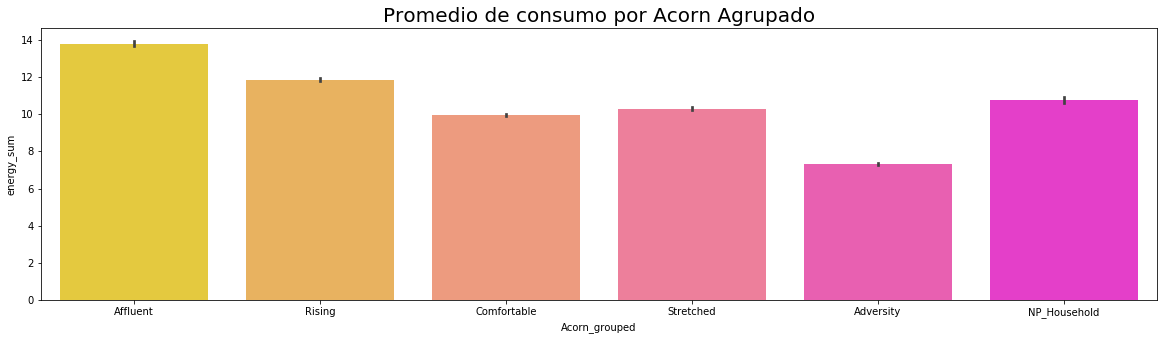

In [34]:
plt.figure(figsize=(20,5))
plt.title('Promedio de consumo por Acorn Agrupado',size=20)
sns.barplot(x=df_grouped.Acorn_grouped, y=df_grouped.energy_sum, palette='spring_r', 
           order= ['Affluent', 'Rising', 'Comfortable', 'Stretched', 'Adversity', 'NP_Household']);


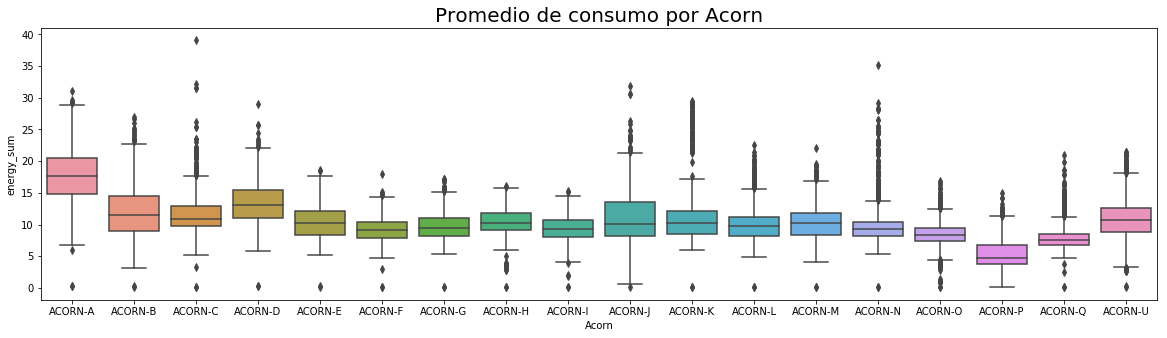

In [35]:

plt.figure(figsize=(20,5))
plt.title('Promedio de consumo por Acorn',size=20)
sns.boxplot(x=df_grouped.Acorn, y=df_grouped.energy_sum, \
           order=["ACORN-A", "ACORN-B", "ACORN-C","ACORN-D", "ACORN-E", "ACORN-F", "ACORN-G", "ACORN-H", "ACORN-I", \
                  "ACORN-J", "ACORN-K", "ACORN-L", "ACORN-M", "ACORN-N",  "ACORN-O", "ACORN-P", "ACORN-Q", "ACORN-U"]);

Graficamos nuevamente el consumo de energía por período por Acorn, pero en un mismo gráfico para evidenciar distintos niveles de consumo


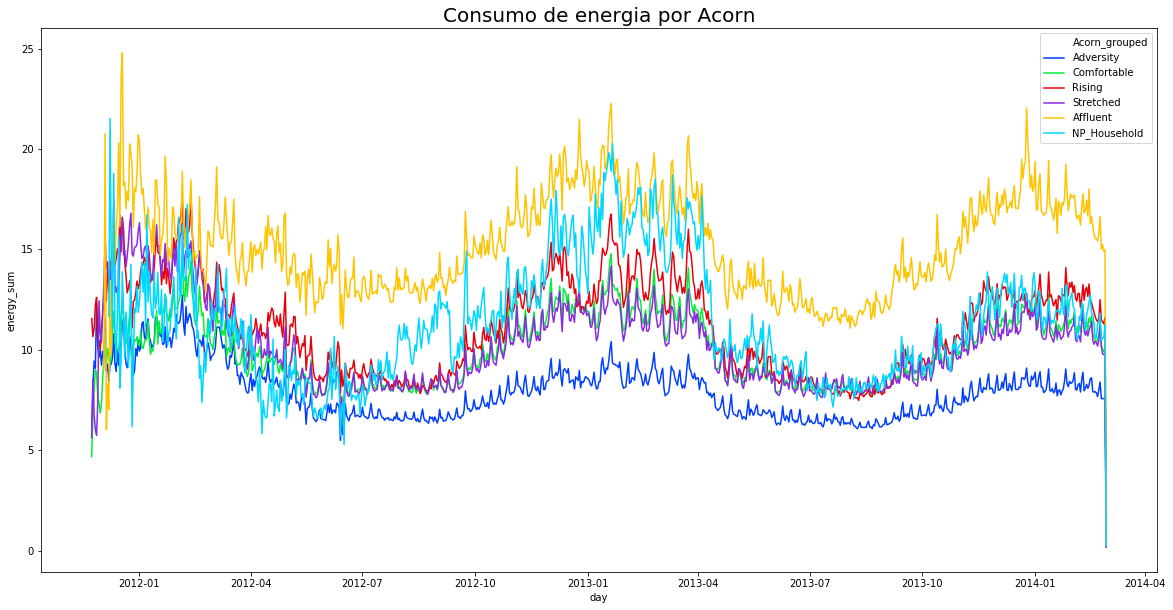

In [36]:
print('Graficamos nuevamente el consumo de energía por período por Acorn, pero en un mismo gráfico para evidenciar distintos niveles de consumo')
plot=pd.DataFrame(df_final.groupby(['day','Acorn_grouped'])['energy_sum'].mean()).reset_index()

plt.figure(figsize=(20,10))

sns.lineplot(x="day", y="energy_sum",
             hue='Acorn_grouped',
             data=plot)
plt.title("Consumo de energia por Acorn", size=20);

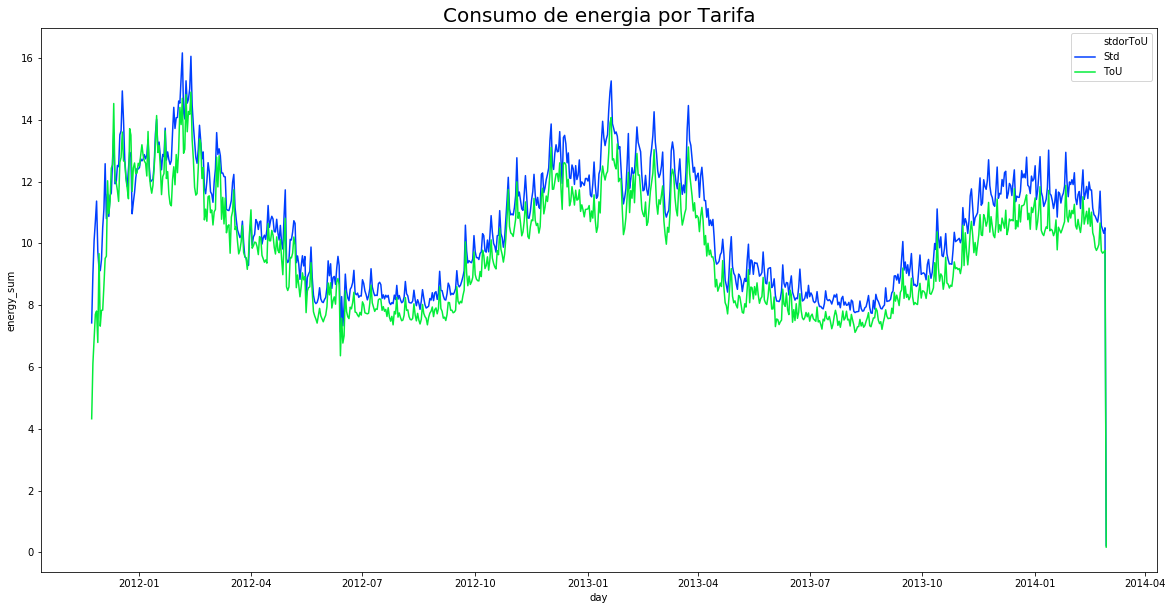

In [37]:

plot=pd.DataFrame(df_final.groupby(['day','stdorToU'])['energy_sum'].mean()).reset_index()

plt.figure(figsize=(20,10))
sns.lineplot(x="day", y="energy_sum",
             hue='stdorToU',
             data=plot)
plt.title("Consumo de energia por Tarifa", size=20);

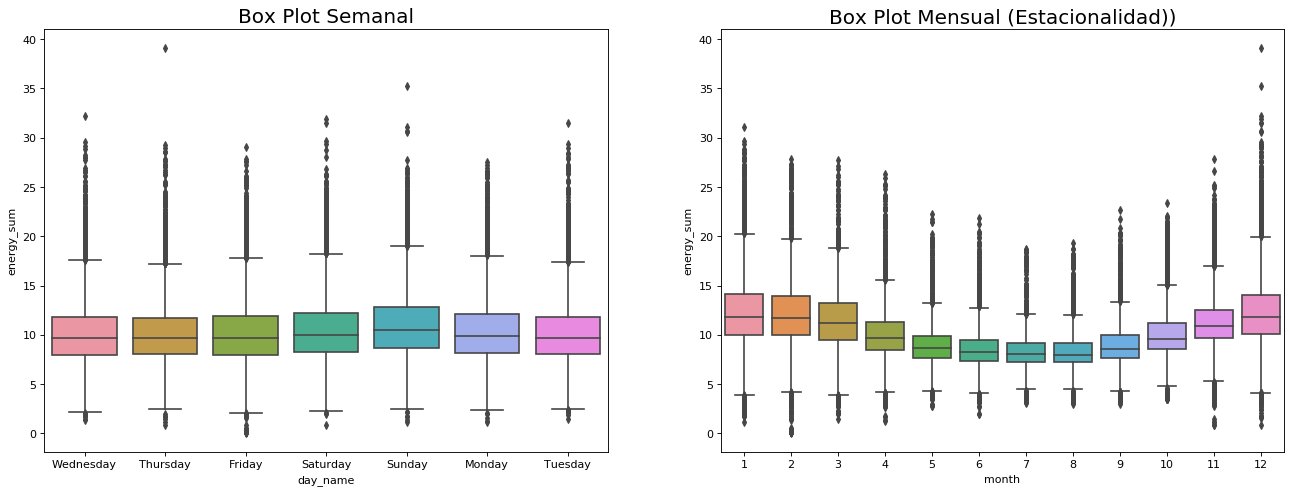

In [38]:

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day_name', y='energy_sum', data=df_grouped, ax=axes[0])
sns.boxplot(x='month', y='energy_sum', data=df_grouped)

axes[0].set_title('Box Plot Semanal', fontsize=18); 
axes[1].set_title('Box Plot Mensual (Estacionalidad))', fontsize=18);


### Correlation Matrix

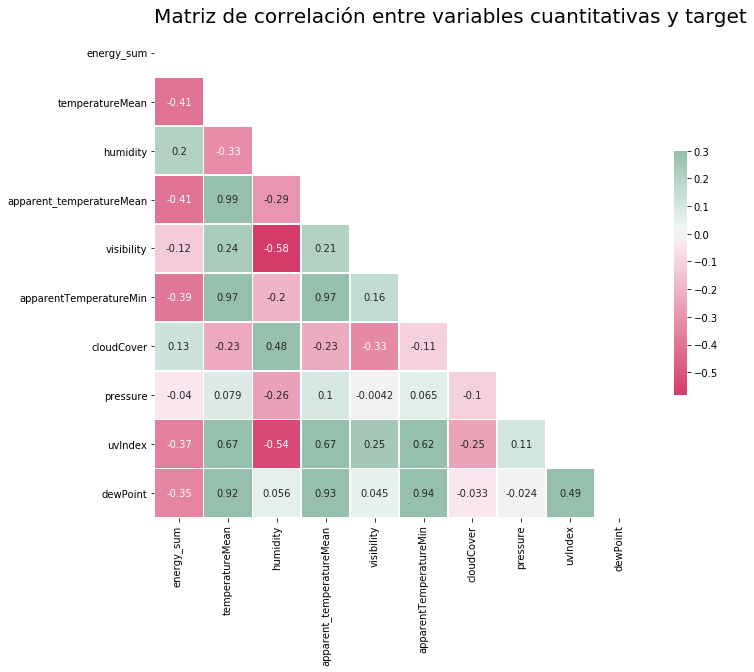

In [39]:
corr=df_grouped[['energy_sum','temperatureMean','humidity',"apparent_temperatureMean",'visibility','apparentTemperatureMin','cloudCover','pressure','uvIndex','dewPoint']].corr()
# Creo una mascara para quedarme con la mitad del cuadrado
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Seteamos la figura
f, ax = plt.subplots(figsize=(11, 9))

# Generamos una paleta divergente para plotear los colores
cmap = sns.diverging_palette(0, 150, as_cmap=True)

# Dibujamos la matriz de correlacion
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlación entre variables cuantitativas y target', size=20, loc='left');

## Energía y variables climáticas. ¿Por qué importan?
Dejando de lado el caso puntual de Londres, es sabido que un truco para ahorrar más en la factura de luz, es tener especial cuidado con todos aquellos artefactos que generan calor. ¿Por qué? Sin adentrarnos en tecnicismos, diremos solamente que generar calor implica un mayor consumo de electricidad.

**¡¡Spoiler Alert!!**

Si el párrafo anterior te resultó familiar, entonces no te será dificil entender por qué en invierno tendemos a consumir más energía: los días más cortos, sumados a las temperaturas más bajas, hacen no solo que prendamos las luces antes, sino que también utilicemos con más frecuencia artefactos que generan calor, y en consecuencia, que consumen más.
En nuestro país, este efecto se ve potenciado debido a que en los barrios carenciados, donde no es común que llegue el gas natural, la gente utiliza artefactos de calefacción eléctrica, muchas de las veces de bajo precio y de consumo no optimizado (a lo cual se suma también que muchos de estos barrios están enmarcados dentro de Acuerdos específicos o tarifas diferenciales, o incluso conectados a la red de manera clandestina)
Pasemos ahora a analizar el consumo de energía, contra las principales variables climáticas de las cuales contamos con información.
------


In [40]:
df_plot = df_final.loc[df_final.day<'2014-02-27']
group_plot =df_plot.groupby('day')[['energy_sum','temperatureMean',\
                        'humidity','visibility','cloudCover','pressure',\
                    'uvIndex']].agg({'energy_sum':'mean','temperatureMean':'mean','humidity':'mean',\
                    'visibility':'mean','cloudCover':'mean','pressure':'mean','uvIndex':'mean' })


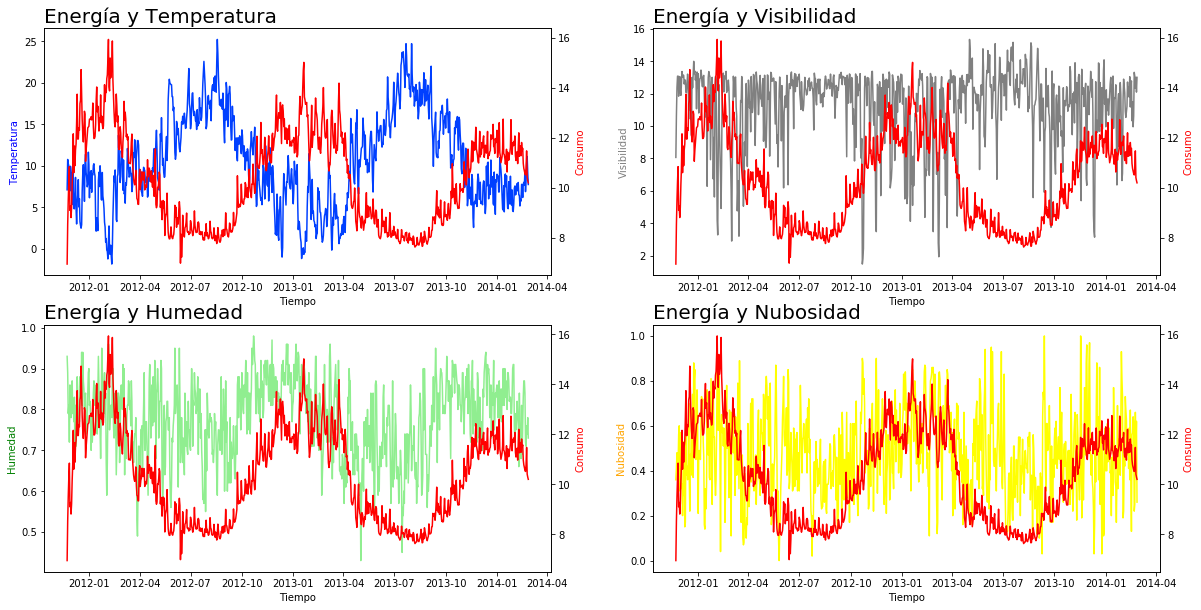

In [41]:
#Energia y Temperatura
fig, ax1 = plt.subplots(2,2,figsize=(20,10))
ax2 = ax1[0,0].twinx()
ax1[0,0].plot(group_plot.index, group_plot['temperatureMean'])
ax2.plot(group_plot.index,  group_plot.energy_sum, color="red" )
ax1[0,0].set_xlabel('Tiempo')
ax1[0,0].set_ylabel('Temperatura', color='b')
ax2.set_ylabel('Consumo', color='r')
plt.title('Energía y Temperatura', size=20, loc='left')
#plt.setp(ax2.get_xticklabels(), visible=False)

#Energia y Humedad
ax3 = ax1[1,0].twinx()
ax1[1,0].plot(group_plot.index, group_plot['humidity'], color='lightgreen')
ax3.plot(group_plot.index,  group_plot.energy_sum, color="red" )
ax1[1,0].set_xlabel('Tiempo')
plt.title('Energía y Humedad', size=20, loc='left')
ax1[1,0].set_ylabel('Humedad', color='green')
ax3.set_ylabel('Consumo', color='r')

#Energía y Visibilidad
ax4 = ax1[0,1].twinx()
ax1[0,1].plot(group_plot.index, group_plot['visibility'], color='grey')
ax4.plot(group_plot.index,  group_plot.energy_sum, color="red" )
ax1[0,1].set_xlabel('Tiempo')
ax1[0,1].set_ylabel('Visibilidad', color='grey')
ax4.set_ylabel('Consumo', color='r')
plt.title('Energía y Visibilidad', size=20, loc='left')
plt.setp(ax2.get_xticklabels(), visible=False)

#Energía y Nubosidad
ax5 = ax1[1,1].twinx()
ax1[1,1].plot(group_plot.index, group_plot['cloudCover'], color='yellow')
ax5.plot(group_plot.index,  group_plot.energy_sum, color="red" )
ax1[1,1].set_xlabel('Tiempo')
ax1[1,1].set_ylabel('Nubosidad', color='orange')
plt.title('Energía y Nubosidad', size=20, loc='left')
ax5.set_ylabel('Consumo', color='r')

plt.show()

In [42]:
#df_final.to_csv('C:/Users/juans/OneDrive/Documentos/Digital House/desafio_ds/energy.csv', index = False)

<a id="section_modelado"></a> 
# <font color='lightblue'> Modelos de estimación de Demanda Promedio a Mediano / Largo plazo </font>
[Volver](#section_toc)

Comenzaremos con un modelo simplifacado de predicción trabajando con el subset de datos agrupados por día y condiciones climáticas, sin considerar tarifa ni acorn.

Optamos por el **consumo promedio** como nuestra variable objetivo, ya que tenemos distinta cantidad de mediciones a lo largo del tiempo. Según la documentación, esto puede deberse a que la implementación de los medidores fue paulatina. También veremos sobre el fin del período analizado una baja en el consumo y las mediciones.

In [43]:
group_plot =df_final.groupby('day')[['energy_sum','apparent_temperatureMean','apparentTemperatureMin','humidity','visibility',\
                                     'cloudCover','pressure','uvIndex','dewPoint', 'temperatureMin']].agg({'energy_sum':'mean',\
                                    'apparent_temperatureMean':'mean','apparentTemperatureMin':'mean',\
                                    'humidity':'mean','visibility':'mean','cloudCover':'mean',\
                                    'pressure':'mean','uvIndex':'mean' ,'dewPoint':'mean', 'temperatureMin':'mean'})
df_model = pd.DataFrame(group_plot)
df_model.reset_index(inplace=True)
df_model.head(2)

day  energy_sum  apparent_temperatureMean  apparentTemperatureMin  \
0 2011-11-23    6.952692                      6.27                    2.18   
1 2011-11-24    8.536480                      9.97                    7.01   

   humidity  visibility  cloudCover  pressure  uvIndex  dewPoint  \
0      0.93        8.06        0.36   1027.12      1.0      6.29   
1      0.89       10.64        0.41   1027.22      1.0      8.56   

   temperatureMin  
0            3.81  
1            8.56

In [44]:
# Como vimos en los gráficos del análisis exploratorio, el consumo durante el último día de febrero 2018 fue atípicamente bajo.
# Por ese motivo desestimaremos esa observación.
df_model.drop(828, axis=0, inplace=True)

In [45]:
df_model.tail(1)

day  energy_sum  apparent_temperatureMean  apparentTemperatureMin  \
827 2014-02-27    10.35635                      5.86                    1.41   

     humidity  visibility  cloudCover  pressure  uvIndex  dewPoint  \
827      0.74       12.04        0.32   1007.02      2.0      3.08   

     temperatureMin  
827            3.93

In [46]:
# Generamos variables indicativas del día, mes y año para nuestro subset agrupado
df_model['year'] = df_model['day'].dt.year
df_model['month'] = df_model['day'].dt.month
df_model['dayofweek'] = df_model['day'].dt.dayofweek
df_model['day_name'] = df_model['day'].dt.day_name()

In [47]:
df_model['month_name'] = df_model['day'].dt.month_name()

In [48]:
df_model.set_index('day', inplace=True)


In [49]:
# Generamos una variable booleana indicadora de fin de semana
df_model['weekend'] = np.logical_or(df_model['day_name'] == 'Saturday', df_model['day_name'] == 'Sunday')

Vamos a crear una **dummy de tiempo**,  para poder modelar la tendencia lineal.

También vamos a crear una variable que sea la dummy de tiempo elevada al cuadrado para modelar la tendencia cuadrática:

In [50]:
df_model["timeIndex"] = pd.Series(np.arange(len(df_model['energy_sum'])), index=df_model.index)
df_model["timeIndex_sq"] = df_model["timeIndex"]**2

In [51]:
# Creamos variables dummy para los meses:
dummies_mes = pd.get_dummies(df_model['month_name'], drop_first=True)


In [52]:
# Creamos variables dummy para los dias y unimos al df principal:
dummies_dia = pd.get_dummies(df_model['day_name'], drop_first=True)
df_model = df_model.join(dummies_dia)


In [53]:
# Hacemos el join entre el DataFrame con la serie de tiempo y las dummies:
df_model = df_model.join(dummies_mes)
df_model.columns

Index(['energy_sum', 'apparent_temperatureMean', 'apparentTemperatureMin',
       'humidity', 'visibility', 'cloudCover', 'pressure', 'uvIndex',
       'dewPoint', 'temperatureMin', 'year', 'month', 'dayofweek', 'day_name',
       'month_name', 'weekend', 'timeIndex', 'timeIndex_sq', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

Vamos a hacer un split entre train y test, teniendo en cuenta que, al tratarse de una serie de tiempo, tenemos que poner *shuffle=False*.

In [54]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_model, test_size=0.3, random_state=42, shuffle=False)

In [55]:
display(df_train.shape, df_test.shape)

(579, 35)

(249, 35)

Vamos a plotear la serie de train y test, para asegurarnos que se mantuvo la secuencia de fechas

DF Train y DF Test


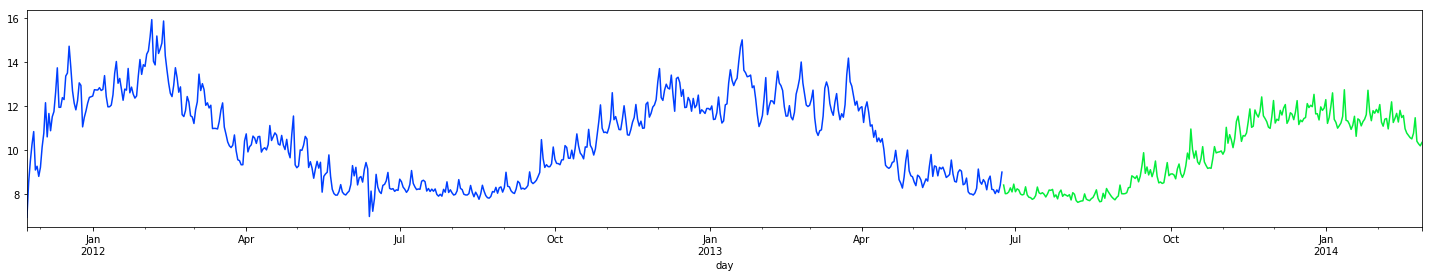

In [56]:
print('DF Train y DF Test')
df_train['energy_sum'].plot(figsize=(25,4))
df_test['energy_sum'].plot(figsize=(25,4));

In [57]:
df_test.head(2)

energy_sum  apparent_temperatureMean  apparentTemperatureMin  \
day                                                                        
2013-06-24     8.41986                     13.36                   10.62   
2013-06-25     8.02719                     15.01                   11.26   

            humidity  visibility  cloudCover  pressure  uvIndex  dewPoint  \
day                                                                         
2013-06-24      0.66       12.89        0.52   1021.79      5.0      7.04   
2013-06-25      0.57       14.24        0.42   1028.61      6.0      6.54   

            temperatureMin  ...  December  February  January July June  March  \
day                         ...                                                 
2013-06-24           10.62  ...         0         0        0    0    1      0   
2013-06-25           11.26  ...         0         0        0    0    1      0   

            May  November  October  September  
day                                            
2013-06-24    0         0        0          0  
2013-06-25    0         0        0          0  

[2 rows x 35 columns]

In [58]:
# Definimos una funcion que nos calcule el RMSE para comparar los modelos
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

<a id="section_tendencia_lineal"></a> 

### <font color='orange'> Modelo de tendencia lineal</font>
[Volver](#section_toc)

In [59]:
#model_linear = smf.ols('energy_sum ~ timeIndex', data = df_train).fit()

In [60]:
model_linear = smf.ols('energy_sum ~ timeIndex', data=df_train).fit()

In [61]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             energy_sum   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.60
Date:                Mon, 24 May 2021   Prob (F-statistic):           0.000248
Time:                        17:23:45   Log-Likelihood:                -1193.8
No. Observations:                 579   AIC:                             2392.
Df Residuals:                     577   BIC:                             2400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0855      0.158     70.091      0.000      10.775      11.396
timeIndex     -0.0017      0.000     -3.688      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      159.982   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.224
Skew:                           0.187   Prob(JB):                     2.73e-07
Kurtosis:                       1.945   Cond. No.                         667.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df_train["LinearTrend"] = model_linear.predict(df_train.timeIndex)
df_test["LinearTrend"] = model_linear.predict(df_test.timeIndex)

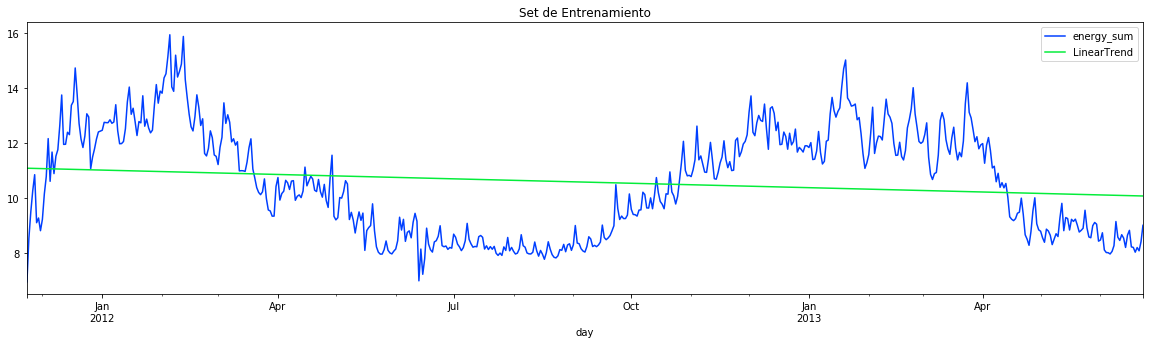

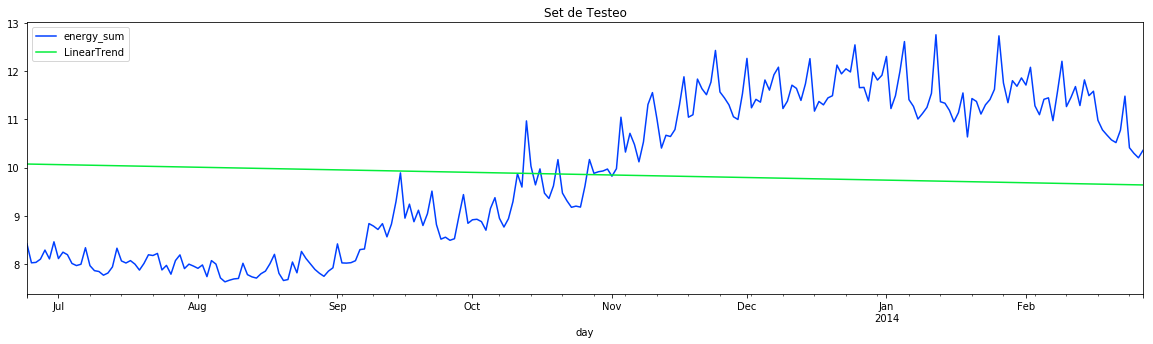

In [63]:
df_train.plot(kind = "line", y = ["energy_sum","LinearTrend"],figsize=(20,5),title='Set de Entrenamiento');
df_test.plot(kind = "line", y = ["energy_sum","LinearTrend"],figsize=(20,5), title='Set de Testeo');

In [64]:
#Guardamos los resultados en un Data Frame

df_Results = pd.DataFrame(columns = ["Model", "RMSE", "R2"])
df_Results.loc[0, "Model"] = "Linear"
df_Results.loc[0, "RMSE"] = RMSE(df_test.LinearTrend, df_test.energy_sum)
df_Results.loc[0,"R2"] = r2_score( df_test.energy_sum, df_test.LinearTrend)
df_Results.head()

Model     RMSE        R2
0  Linear  1.68338 -0.149072

<a id="section_logaritmica"></a> 

### <font color='orange'> Modelo de tendencia con Transformación Logarítmica</font>
[Volver](#section_toc)

In [65]:
df_train['log_value'] = np.log(df_train['energy_sum'])
df_test['log_value'] = np.log(df_test['energy_sum'])

In [66]:
model_logarit = smf.ols('log_value ~ timeIndex ', data = df_train).fit()

In [67]:
model_logarit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     11.96
Date:                Mon, 24 May 2021   Prob (F-statistic):           0.000583
Time:                        17:23:46   Log-Likelihood:                 169.56
No. Observations:                 579   AIC:                            -335.1
Df Residuals:                     577   BIC:                            -326.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3874      0.015    159.024      0.000       2.358       2.417
timeIndex     -0.0002    4.5e-05     -3.459      0.001      -0.000   -6.72e-05
==============================================================================
Omnibus:                      358.293   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.347
Skew:                          -0.031   Prob(JB):                     3.48e-08
Kurtosis:                       1.808   Cond. No.                         667.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
df_train['model_log'] = model_logarit.predict(df_train[["timeIndex"]])
df_test['model_log'] = model_logarit.predict(df_test[["timeIndex"]])

In [69]:
df_train['back_model_log'] = np.exp(df_train['model_log'])
df_test['back_model_log'] = np.exp(df_test['model_log'])

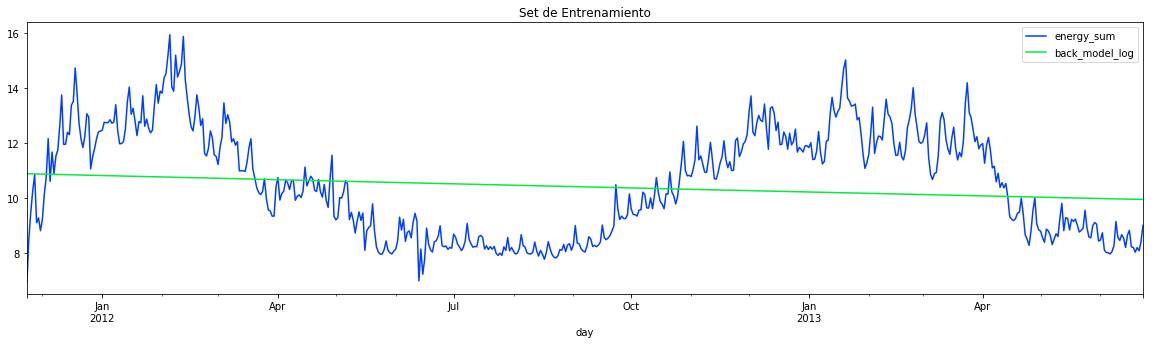

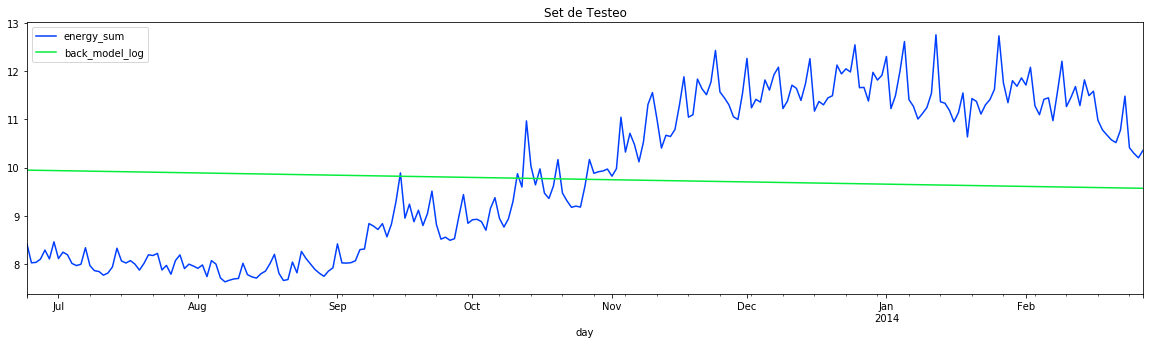

In [70]:
df_train.plot(kind = "line", y = ['energy_sum', 'back_model_log'],figsize=(20,5), title='Set de Entrenamiento');
df_test.plot(kind = "line", y = ['energy_sum', 'back_model_log'],figsize=(20,5),title='Set de Testeo');

In [71]:
df_Results.loc[1, "Model"] = "Transf Log"
df_Results.loc[1, "RMSE"] = RMSE(df_test['back_model_log'], df_test['energy_sum'])
df_Results.loc[1,"R2"] = r2_score( df_test.energy_sum, df_test.back_model_log)
df_Results

Model     RMSE        R2
0      Linear  1.68338 -0.149072
1  Transf Log  1.67298 -0.134916

<a id="section_logaritmica_estacional"></a> 

### <font color='orange'> Modelo de tendencia con Transformación Logarítmica y Estacionalidad Mensual</font>
[Volver](#section_toc)

In [72]:
model_log_estac = smf.ols('log_value ~ timeIndex + August + December + \
                        February + January + July + June + March + May + November + September',\
                          data = df_train).fit()

In [73]:
model_log_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     251.4
Date:                Mon, 24 May 2021   Prob (F-statistic):          8.32e-210
Time:                        17:23:47   Log-Likelihood:                 676.33
No. Observations:                 579   AIC:                            -1329.
Df Residuals:                     567   BIC:                            -1276.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3117      0.010    224.952      0.000       2.291       2.332
timeIndex   2.086e-05   1.98e-05      1.053      0.293   -1.81e-05    5.98e-05
August        -0.2265      0.016    -14.281      0.000      -0.258      -0.195
December       0.1886      0.013     14.791      0.000       0.164       0.214
February       0.2394      0.013     18.547      0.000       0.214       0.265
January        0.2273      0.013     17.972      0.000       0.202       0.252
July          -0.2016      0.016    -12.666      0.000      -0.233      -0.170
June          -0.1899      0.013    -14.433      0.000      -0.216      -0.164
March          0.1319      0.013     10.524      0.000       0.107       0.157
May           -0.1315      0.013    -10.492      0.000      -0.156      -0.107
November       0.0712      0.015      4.843      0.000       0.042       0.100
September     -0.1498      0.016     -9.354      0.000      -0.181      -0.118
==============================================================================
Omnibus:                       56.377   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.982
Skew:                          -0.462   Prob(JB):                     6.70e-36
Kurtosis:                       5.421   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
df_train['model_log_est'] = model_log_estac.predict(df_train[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "November", "September"]])


df_test['model_log_est'] = model_log_estac.predict(df_test[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "November", "September"]])

In [75]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

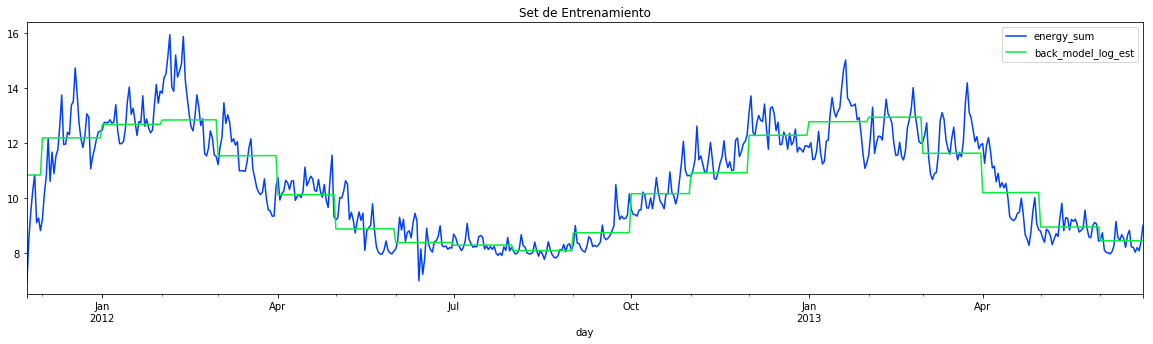

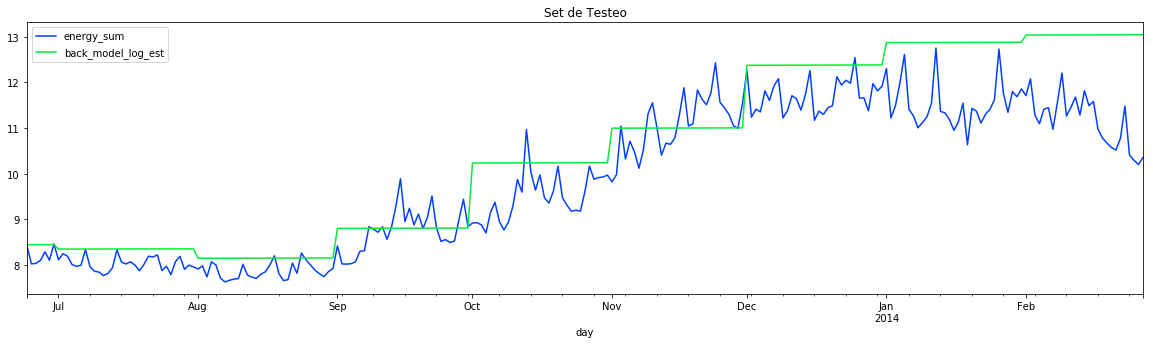

In [76]:
df_train.plot(kind = "line", y = ['energy_sum', 'back_model_log_est'],figsize=(20,5), title='Set de Entrenamiento');
df_test.plot(kind = "line", y = ['energy_sum', 'back_model_log_est'],figsize=(20,5), title='Set de Testeo');

In [77]:
df_Results.loc[2, "Model"] = "Transf Log + Month"
df_Results.loc[2, "RMSE"] = RMSE(df_test['back_model_log_est'], df_test['energy_sum'])
df_Results.loc[2,"R2"] = r2_score( df_test.energy_sum, df_test.back_model_log_est)
df_Results

Model      RMSE        R2
0              Linear   1.68338 -0.149072
1          Transf Log   1.67298 -0.134916
2  Transf Log + Month  0.970193  0.618322

<a id="section_logaritmica_diaria"></a> 

### <font color='orange'> Modelo de tendencia con: Transformación Logarítmica + Estacionalidad Mensual + Ciclos diarios</font>
[Volver](#section_toc)

In [78]:
model_log_est_diaria = smf.ols('log_value ~ timeIndex + August + December +\
                          February + January + July + June + March + \
                          May + November + September + Saturday + Sunday',\
                          data = df_train).fit()

In [79]:
model_log_est_diaria.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 24 May 2021   Prob (F-statistic):          4.79e-224
Time:                        17:23:48   Log-Likelihood:                 715.74
No. Observations:                 579   AIC:                            -1403.
Df Residuals:                     565   BIC:                            -1342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2976      0.010    235.024      0.000       2.278       2.317
timeIndex   1.958e-05   1.85e-05      1.056      0.291   -1.68e-05     5.6e-05
August        -0.2254      0.015    -15.188      0.000      -0.255      -0.196
December       0.1875      0.012     15.708      0.000       0.164       0.211
February       0.2392      0.012     19.809      0.000       0.216       0.263
January        0.2271      0.012     19.186      0.000       0.204       0.250
July          -0.2030      0.015    -13.631      0.000      -0.232      -0.174
June          -0.1915      0.012    -15.545      0.000      -0.216      -0.167
March          0.1309      0.012     11.157      0.000       0.108       0.154
May           -0.1303      0.012    -11.111      0.000      -0.153      -0.107
November       0.0721      0.014      5.234      0.000       0.045       0.099
September     -0.1526      0.015    -10.178      0.000      -0.182      -0.123
Saturday       0.0268      0.009      3.128      0.002       0.010       0.044
Sunday         0.0764      0.009      8.926      0.000       0.060       0.093
==============================================================================
Omnibus:                       68.022   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.097
Skew:                          -0.556   Prob(JB):                     7.91e-45
Kurtosis:                       5.680   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
df_train['model_log_est_day'] = model_log_est_diaria.predict(df_train[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "November", "September",\
                                                 'Saturday' , 'Sunday',\
                          'Thursday' , 'Tuesday' , 'Wednesday' , 'weekend']])


df_test['model_log_est_day'] = model_log_est_diaria.predict(df_test[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "November", "September",\
                                                'Saturday' , 'Sunday',\
                          'Thursday' , 'Tuesday' , 'Wednesday' , 'weekend']])

In [81]:
df_train['back_model_log_est_day'] = np.exp(df_train['model_log_est_day'])
df_test['back_model_log_est_day'] = np.exp(df_test['model_log_est_day'])

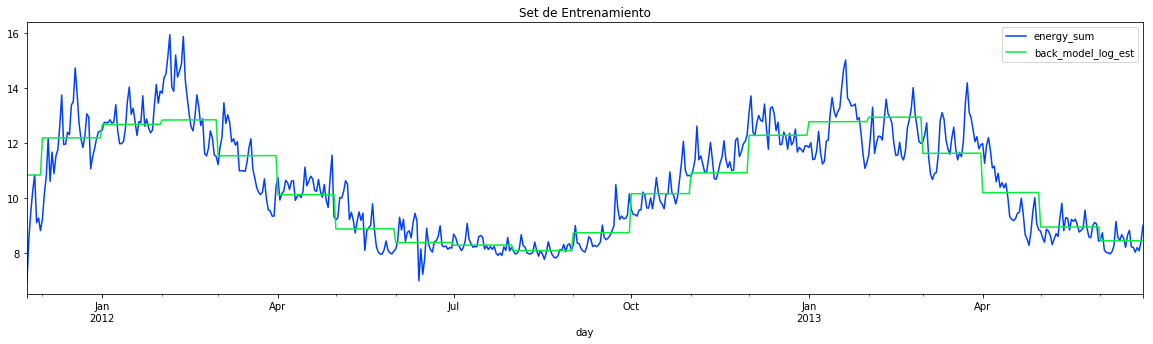

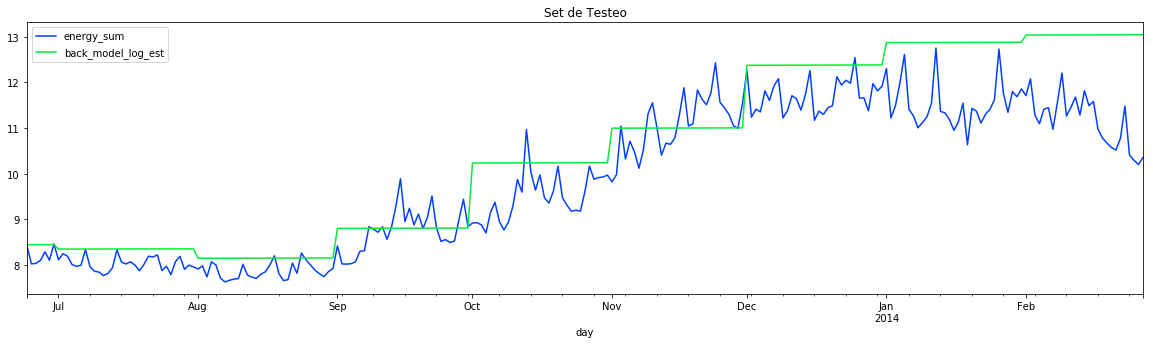

In [82]:
df_train.plot(kind = "line", y = ['energy_sum', 'back_model_log_est'],figsize=(20,5), title='Set de Entrenamiento');
df_test.plot(kind = "line", y = ['energy_sum', 'back_model_log_est'],figsize=(20,5), title='Set de Testeo');

In [83]:
df_Results.loc[3, "Model"] = "Transf Log + Month + Day"
df_Results.loc[3, "RMSE"] = RMSE(df_test['back_model_log_est_day'], df_test['energy_sum'])
df_Results.loc[3,"R2"] = r2_score( df_test.energy_sum, df_test.back_model_log_est_day)
df_Results

Model      RMSE        R2
0                    Linear   1.68338 -0.149072
1                Transf Log   1.67298 -0.134916
2        Transf Log + Month  0.970193  0.618322
3  Transf Log + Month + Day  0.944494  0.638274

<a id="section_clima"></a> 

### <font color='orange'> Modelo de tendencia con: Transformación Logarítmica + Estacionalidad Mensual + Ciclos diarios + Clima</font>

[Volver](#section_toc)

In [84]:
model_log_clima = smf.ols("log_value ~ timeIndex + August + December + February + January + \
                                                July + June + March + May + \
                                                September + Saturday + Sunday + \
                                                apparent_temperatureMean + uvIndex + humidity + cloudCover",\
                          data = df_train).fit()


                                

In [85]:
model_log_clima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     463.2
Date:                Mon, 24 May 2021   Prob (F-statistic):          3.86e-311
Time:                        17:23:49   Log-Likelihood:                 931.45
No. Observations:                 579   AIC:                            -1829.
Df Residuals:                     562   BIC:                            -1755.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.3729      0.027     89.283      0.000       2.321       2.425
timeIndex                -6.886e-05   1.34e-05     -5.157      0.000   -9.51e-05   -4.26e-05
August                      -0.0781      0.012     -6.440      0.000      -0.102      -0.054
December                     0.0813      0.009      9.064      0.000       0.064       0.099
February                     0.1181      0.009     12.759      0.000       0.100       0.136
January                      0.1177      0.009     13.532      0.000       0.101       0.135
July                        -0.0650      0.014     -4.794      0.000      -0.092      -0.038
June                        -0.0726      0.012     -6.091      0.000      -0.096      -0.049
March                        0.0713      0.008      9.047      0.000       0.056       0.087
May                         -0.0527      0.010     -5.151      0.000      -0.073      -0.033
September                   -0.0782      0.011     -7.250      0.000      -0.099      -0.057
Saturday                     0.0255      0.006      4.295      0.000       0.014       0.037
Sunday                       0.0688      0.006     11.580      0.000       0.057       0.080
apparent_temperatureMean    -0.0122      0.001    -21.431      0.000      -0.013      -0.011
uvIndex                     -0.0152      0.003     -5.388      0.000      -0.021      -0.010
humidity                     0.1043      0.030      3.421      0.001       0.044       0.164
cloudCover                   0.0492      0.014      3.624      0.000       0.023       0.076
==============================================================================
Omnibus:                      331.538   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5958.100
Skew:                          -2.133   Prob(JB):                         0.00
Kurtosis:                      18.125   Cond. No.                     6.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
df_train['model_log_clima'] = model_log_clima.predict(df_train[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "September","Saturday" ,"Sunday",\
                                                "apparent_temperatureMean","uvIndex","humidity","cloudCover"]])


df_test['model_log_clima'] = model_log_clima.predict(df_test[["timeIndex", \
                                              "August", "December", "February", "January",\
                                               "July", "June", "March", "May",\
                                                "September","Saturday" ,"Sunday",\
                                                "apparent_temperatureMean", "uvIndex","humidity","cloudCover"]])

In [87]:
df_train['back_model_log_clima'] = np.exp(df_train['model_log_clima'])
df_test['back_model_log_clima'] = np.exp(df_test['model_log_clima'])

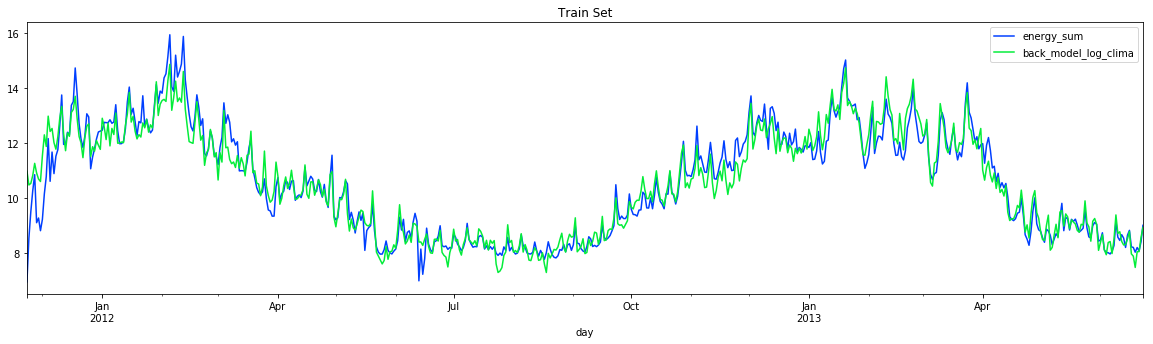

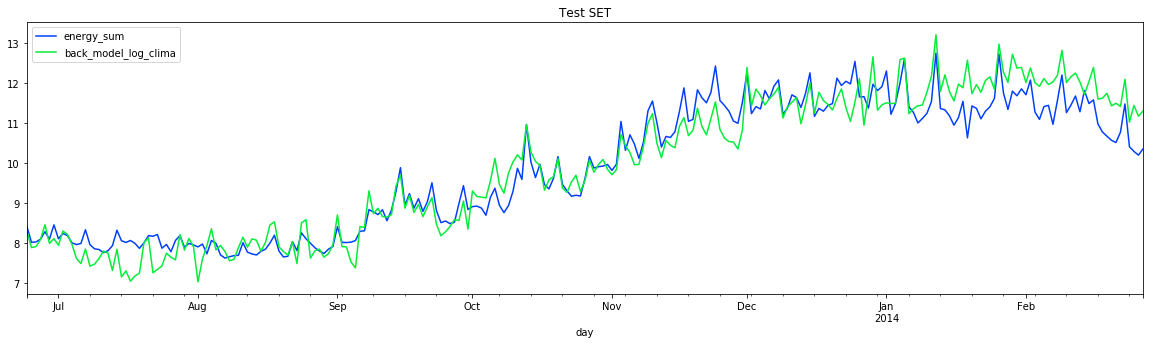

In [88]:
df_train.plot(kind = "line", y = ['energy_sum', 'back_model_log_clima'],figsize=(20,5), title='Train Set');
df_test.plot(kind = "line", y = ['energy_sum', 'back_model_log_clima'], figsize=(20,5), title='Test SET' );

In [89]:
df_Results.loc[4, "Model"] = "Transf Log + Month + Day + Weather"
df_Results.loc[4, "RMSE"] = RMSE(df_test['back_model_log_clima'], df_test['energy_sum'])
df_Results.loc[4,"R2"] = r2_score( df_test.energy_sum, df_test.back_model_log_clima)
df_Results

Model      RMSE        R2
0                              Linear   1.68338 -0.149072
1                          Transf Log   1.67298 -0.134916
2                  Transf Log + Month  0.970193  0.618322
3            Transf Log + Month + Day  0.944494  0.638274
4  Transf Log + Month + Day + Weather  0.481693  0.905915

<a id="section_residuos"></a> 

### <font color='orange'> Análisis de Residuos </font>
[Volver](#section_toc)

Analizaremos respecto a nuestro mejor modelo, el cual contiene estacionalidad mensual, diaria y variables exógenas de las condiciones climáticas promedio.

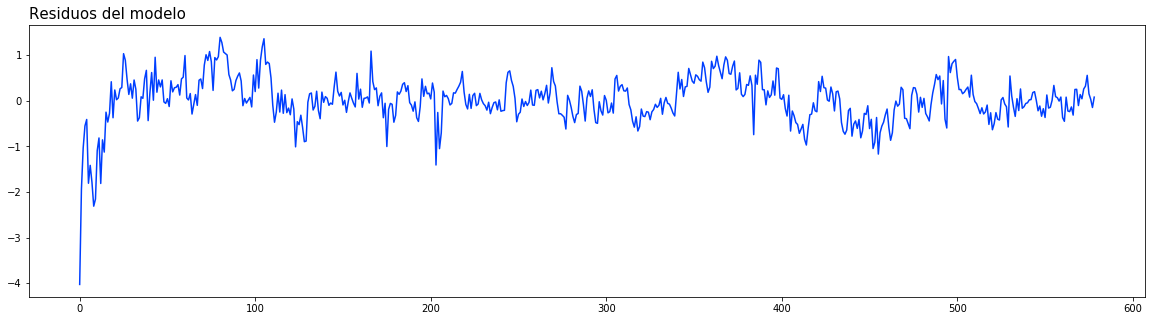

In [90]:
res_model = df_train['energy_sum'] - df_train['back_model_log_clima']
plt.figure(figsize=(20,5))
plt.title('Residuos del modelo', size=15,loc='left')
plt.plot(df_train.timeIndex, res_model,'-')

In [91]:
# Testeamos la estacionariedad de los residuos:

from statsmodels.tsa.stattools import adfuller

result = adfuller(res_model)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -5.276310
p-value: 0.000006
Valor crítico 1%: -3.44
Valor crítico 5%: -2.87
Valor crítico 10%: -2.57


<a id="section_arima"></a> 

### <font color='orange'> Modelo ARIMA </font>
[Volver](#section_toc)

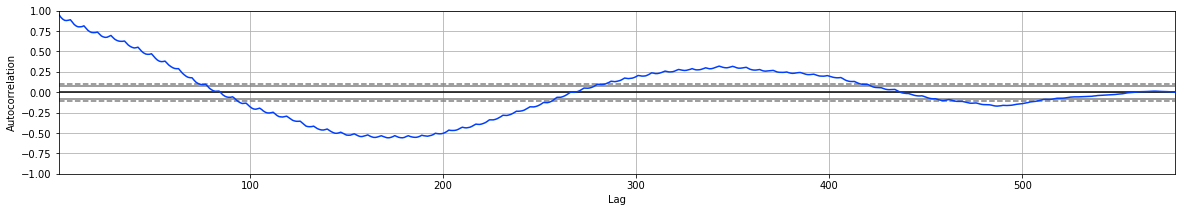

In [92]:
plt.figure(figsize=(20,3))
pd.plotting.autocorrelation_plot(df_train['energy_sum'])
plt.show()

In [93]:
res_log_est = df_train['log_value'] - df_train['model_log_clima']
lag_acf = acf(res_log_est, nlags = 20)
lag_acf

array([1.        , 0.64089059, 0.51972892, 0.43294203, 0.36656724,
       0.38025196, 0.33691251, 0.31954468, 0.27699463, 0.2510587 ,
       0.1809558 , 0.16584381, 0.15560798, 0.10995904, 0.11235293,
       0.07077443, 0.06817495, 0.05862875, 0.0368583 , 0.03802609,
       0.03359007])

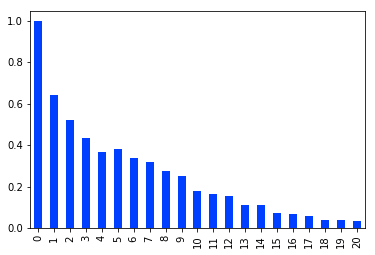

In [94]:
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar");

Calculamos la PACF para res_log con 20 rezagos. Usamos mínimos cuadrádos ordinarios para estimar los parámetros:

In [95]:
lag_Pac = pacf(res_log_est, nlags=20, method='ols');

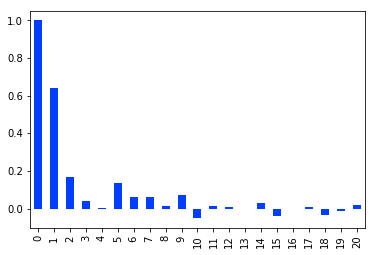

In [96]:
PACF = pd.Series(lag_Pac)
PACF.plot(kind = "bar");

Vamos a definir una función que va a plotear una serie y nos va a dar información sobre su estacionariedad y sobre sus ACF y PACF:

In [97]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        
        # definimos ejes
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        
        # obtengo el p-value con h0: raiz unitaria presente
        p_value = sm.tsa.stattools.adfuller(y)[1]
        
        ts_ax.set_title('Análisis de la Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'\
                        .format(p_value))
        
        # plot de autocorrelacion
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        # plot de autocorrelacion parcial
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

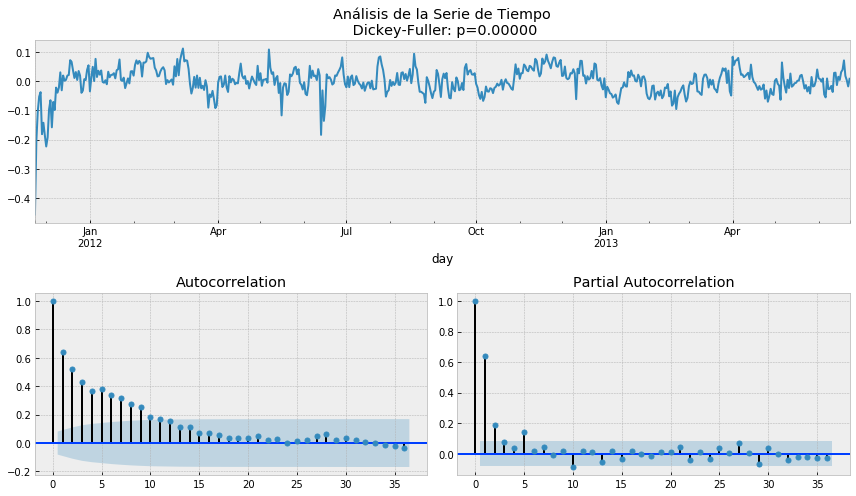

In [98]:
tsplot(res_log_est, lags=36)

Instancio el modelo con parámetros ($p=2$, $d=0$, $q=1$) , luego de hacer varios intentos fueron los que obtuverion mejores resultados

En este caso $d=0$ porque trabajamos directamente con una serie estacionaria. 

In [99]:
model_ARIMA = ARIMA(res_log_est, order=(2,0,1))

# Estimo el modelo:
results_ARIMA = model_ARIMA.fit()
results_ARIMA.fittedvalues.head()

day
2011-11-23   -0.011022
2011-11-24   -0.376456
2011-11-25   -0.223431
2011-11-26   -0.149802
2011-11-27   -0.104426
dtype: float64

In [100]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  579
Model:                     ARMA(2, 1)   Log Likelihood                1137.291
Method:                       css-mle   S.D. of innovations              0.034
Date:                Mon, 24 May 2021   AIC                          -2264.582
Time:                        17:23:54   BIC                          -2242.775
Sample:                    11-23-2011   HQIC                         -2256.080
                         - 06-23-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0110      0.018     -0.614      0.539      -0.046       0.024
ar.L1.y        1.3743      0.095     14.537      0.000       1.189       1.560
ar.L2.y       -0.3933      0.085     -4.641      0.0

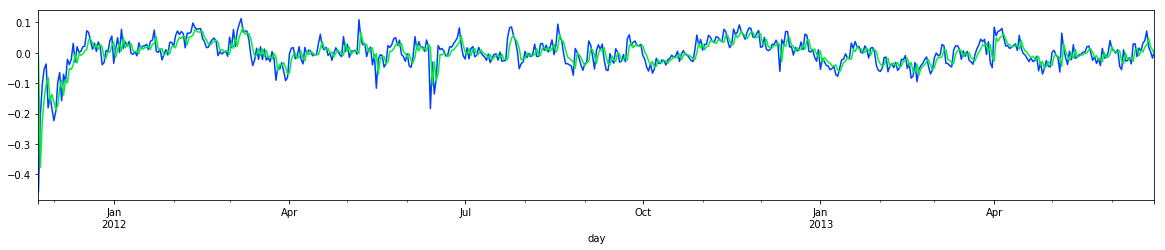

In [101]:
plt.figure(figsize=(20,3.5))
res_log_est.plot()
results_ARIMA.fittedvalues.plot();

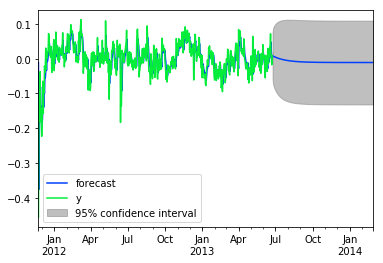

In [102]:
results_ARIMA.plot_predict(end=len(df_model['energy_sum']));

In [103]:
res_ARIMA =  results_ARIMA.fittedvalues - res_log_est

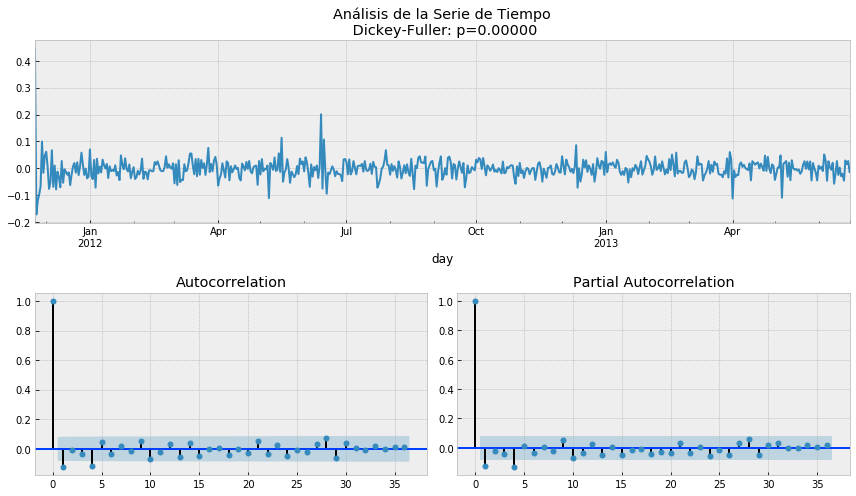

In [104]:
tsplot(res_ARIMA, lags=36)

In [105]:
predictions_ARIMA, se, conf = results_ARIMA.forecast(len(df_test['energy_sum']), alpha=0.05)

In [106]:
df_train['log_model_ARIMA'] = df_train['model_log_clima'] + results_ARIMA.fittedvalues

df_test['log_model_ARIMA'] = df_test['model_log_clima'] + predictions_ARIMA

In [107]:
df_train['back_log_model_ARIMA'] = np.exp(df_train['log_model_ARIMA'])

df_test['back_log_model_ARIMA'] = np.exp(df_test['log_model_ARIMA'])

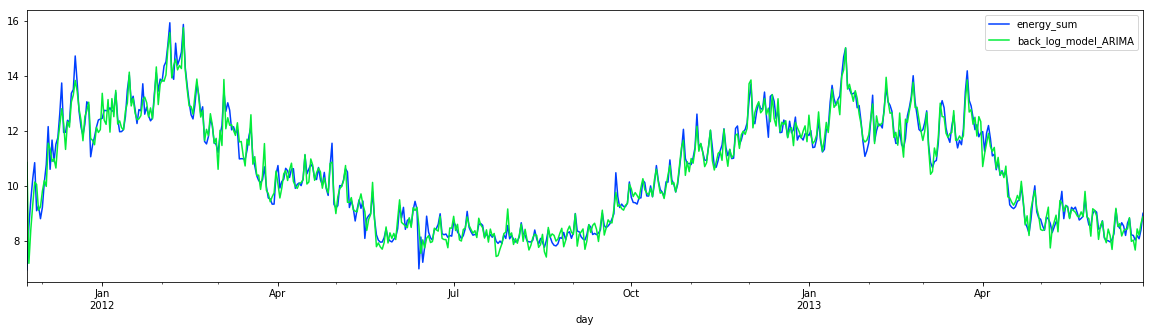

In [108]:
df_train.plot(kind = "line", y = ['energy_sum', 'back_log_model_ARIMA'],figsize=(20,5));

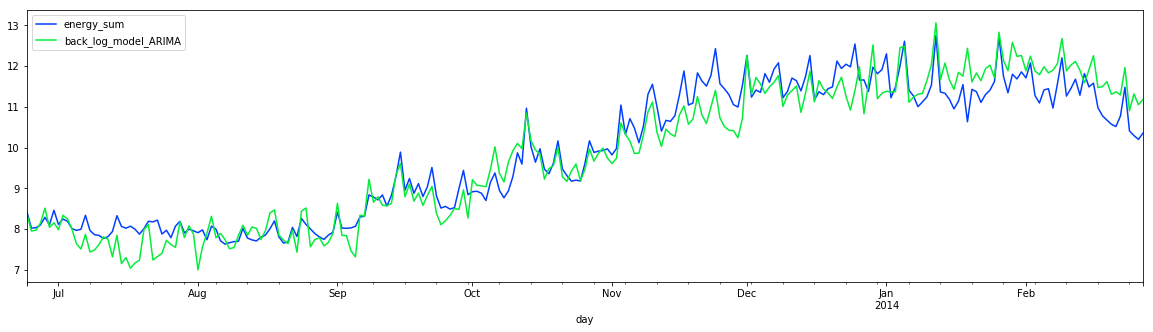

In [109]:
df_test.plot(kind = "line", y = ['energy_sum', 'back_log_model_ARIMA'],figsize=(20,5));

In [110]:
df_Results.loc[5, "Model"] = "Log Model + Month + Day + Weather + ARIMA"
df_Results.loc[5, "RMSE"] = RMSE(df_test['back_log_model_ARIMA'], df_test['energy_sum'])
df_Results.loc[5,"R2"] = r2_score( df_test.energy_sum, df_test.back_log_model_ARIMA)
df_Results

Model      RMSE        R2
0                                     Linear   1.68338 -0.149072
1                                 Transf Log   1.67298 -0.134916
2                         Transf Log + Month  0.970193  0.618322
3                   Transf Log + Month + Day  0.944494  0.638274
4         Transf Log + Month + Day + Weather  0.481693  0.905915
5  Log Model + Month + Day + Weather + ARIMA  0.467491  0.911381

<img src=https://cdn.fastly.picmonkey.com/content4/previews/superhero/soundeffects/sh_sfx_24_550.png>

<a id="section_bonus"></a> 

### <font color='orange'> BONUS!! </font>
[Volver](#section_toc)

Si llegaste hasta acá, es porque la temática realmente te interesó, y estás interesado en conocer cuál es el final de la historia para este primer problema de predicción a Mediano y Largo plazo de la demanda.
Como vimos, el último modelo con la transformación logarítmica, y la incorporación de dummies de Meses, Días y Variables climáticas obtuvo una performance respetable. Luego, al analizar los residuos de este modelo, pudimos avanzar en la mejora de la capacidad predictiva, a partir de la utilización de ARIMA.

La problemática es tanto compleja como motivante, y podríamos dedicar mucho más tiempo a intentar perfeccionar nuestro modelo. Pero a los fines de este trabajo, creímos conveniente dar un punto y aparte, para pasar a aplicar de forma rápida y solo a efectos de hacer un primer acercamiento, otros tipo de **modelos** y **técnicas** que tuvimos el agrado de investigar.

Disfruten este Bonus Track!!

<a id="section_time_series"></a> 
## Time Series Split
[Volver](#section_toc)

Como pudieron observar, en nuestros modelos anteriores trabajamos con un Train Test Split tradicional, particionando los datos en un 70% para entrenamiento y un 30% para testeo.

Una técnica adicional si buscamos obtener un score más robusto de la performance de nuestro modelo, es hacer un cross validation sobre el dataset, pero **cuidado**, que al ser datos ordenados en el tiempo, un CV tradicional nos llevaría a caer en Data Leakage.

Es por ello que se utilizan métodos alternativos, como el **Time Series Split**, que permiten realizar una validación cruzada sobre series temporales. A modo ejemplificativo, aplicaremos esta técnica sobre nuestro modelo con **Transformación Logarítmica + Estacionalidad mensual y diaria + variables climáticas**, y veremos cómo performan los distintos scores a medida que avanzan los Folds.

In [111]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error

In [112]:
df_model['log_value'] = np.log(df_model.energy_sum)

In [113]:
### Definimos una función a la que dado un DataFrame y un número de Splits, nos arrojará un DataFrame 
### con los scores obtenidos al aplicar nuestro modelo de predicción en cada validation fold.

def timeseriesCVscore(df_model, n_splits):

    errors = []
    
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for train, test in tscv.split(df_model):
        
            model = smf.ols("log_value ~ timeIndex + August + December + February + January + \
                                                    July + June + March + May + \
                                                    September + Saturday + Sunday + \
                                                    apparent_temperatureMean + uvIndex + humidity + cloudCover",\
                              data = df_model.iloc[train,:]).fit()
            
            predictions_log = model.predict(df_model.iloc[test,:][["timeIndex", \
                                                  "August", "December", "February", "January",\
                                                   "July", "June", "March", "May",\
                                                    "September","Saturday" ,"Sunday",\
                                                    "apparent_temperatureMean", "uvIndex","humidity","cloudCover"]])
            
            predictions = np.exp(predictions_log)
    
            #predictions = model.forecast(len(test))
            actual = df_model.iloc[test,0]
        
            error = mean_squared_error(predictions, actual)
            errors.append(error)
            errores = np.array(errors).round(2)
            periodos = np.array(np.arange(n_splits)+1)
            df= pd.DataFrame(data=errores)
            df = df.rename(columns={0:'RMSE'})

    print('RMSE según Folds')
    return display(df, df.plot(kind='bar'));



RMSE según Folds


RMSE
0  0.42
1  7.52
2  4.81
3  0.12
4  0.13
5  0.40

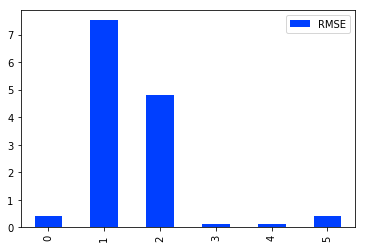

In [114]:
timeseriesCVscore(df_model, 6)

<a id="section_panel"></a> 
## Modelo con Datos de Panel
[Volver](#section_toc)

A efectos de trabajar el dataset con un modelo de panel, reorganizaremos ligeramente nuestra estructura de datos, conservando esta vez las features demograficas, en un Dataset Multi Index.


In [115]:
# A efectos de poder transformar el dataset y no pisar los modelos desarrollados anteriormente, generamos una copia de nuestro DF Final
df_final2 = df_final.copy()

In [116]:
# Quitamos los registros de consumo del 28/02/2014 que muestra una disminución muy marcada de consumo, con lo cual sospechamos que puede ser algún outlier en la medición.
df_final2 = df_final2.loc[df_final2.day<'2014-02-28']

In [117]:
#Volvemos a generar nuestras variables temporales, y creamos una copia de "day" a efectos de poder realizar los filtrados posteriores

df_final2['day2']=df_final2['day']
df_final2['year'] = df_final2['day2'].dt.year
df_final2['month'] = df_final2['day2'].dt.month
df_final2['dayofweek'] = df_final2['day2'].dt.dayofweek
df_final2['day_name'] = df_final2['day2'].dt.day_name()
df_final2['month_name'] = df_final2['day2'].dt.month_name()

Para poder trabajar con un valor de consumo de energía que no se vea afectado por la cantidad de SmartMeters implementados, generamos una agrupación por **Grupo de Acorn**, **Acorn** y **Día**

In [118]:
df_panel = pd.pivot_table(df_final2, values=['energy_sum',\
                        'temperatureMean','apparentTemperatureMin',"apparent_temperatureMean",\
                        'humidity','visibility','cloudCover','pressure',\
                         'uvIndex','dewPoint','day2', 'month_name','day_name'], index=['Acorn_grouped','Acorn','day'],
                    aggfunc={'energy_sum':'mean','temperatureMean':'mean',\
                        'humidity':'mean','visibility':'mean','cloudCover':'mean',\
                        "apparent_temperatureMean":'mean','pressure':'mean',\
                        'uvIndex':'mean','dewPoint':'mean','apparentTemperatureMin':'mean','day2':np.min , \
                            'month_name':np.min,'day_name':np.min})

Para trabajar con un modelo multi index, pero conservar como una feature independiente la variable Acorn Grouped, reseteamos la indexación de la pivot table y re indexamos por Acorn y Día. De esta manera nos quedamos con un dataset que en resumidas cuentas nos muestra el **consumo promedio diario por Acorn**, con detalle de a qué Acorn Grouped pertenece el mismo y qué condiciones climáticas imperaban.

In [119]:
df_panel.reset_index(inplace=True)
df_panel = df_panel.set_index(['Acorn','day'])

Generamos Dummies para nuestras variables categóricas

In [120]:
df_panel = pd.get_dummies(df_panel, columns=['month_name','day_name', 'Acorn_grouped'] ,drop_first=False)

In [121]:
df_panel = df_panel.drop(columns=['day_name_Friday','month_name_August','Acorn_grouped_NP_Household'], axis=1)

Generamos un **Time Index** para utiizar en los modelos predictivos, tanto en train como en test, con las siguientes particularidades:
* Con el método cumcount por día, lo que buscamos es generar **índices** progresivos a lo largo del tiempo pero para **cada Acorn puntual**.


In [122]:
df_panel['timeIndex'] = df_panel.groupby('Acorn').cumcount('day')

En esta ocasión realizamos un método casero para separar el dataset en **Train y Test**, para mantener la homogeneidad de fechas dentro de cada Acorn y que no nos afecte el Multi Index.
La fecha tomada para realizar el corte, es la misma que en los datasets anteriores nos dividían el 70/30 de las observaciones.
De esta forma también nos aseguramos que no se filtren datos del futuro para ningún Acorn

In [123]:
df_panel_train = df_panel.loc[df_panel.day2<'2013-06-24']
df_panel_test = df_panel.loc[df_panel.day2>='2013-06-24']

In [124]:
display(df_panel_train.shape, df_panel_test.shape)
print('% de datos en train: ', (df_panel_train.shape[0]/df_panel.shape[0]))
print('% de datos en test: ', (df_panel_test.shape[0]/df_panel.shape[0]))
print('Fecha más nueva en Train: ',df_panel_train.day2.max())
print('Fecha más antigua en Test: ', df_panel_test.day2.min())

(10222, 34)

(4482, 34)

% de datos en train:  0.6951849836779108
% de datos en test:  0.30481501632208924
Fecha más nueva en Train:  2013-06-23 00:00:00
Fecha más antigua en Test:  2013-06-24 00:00:00


Finalmente, generamos una variable logarítmica para nuestra feature objetivo, y comenzamos a entrenar nuestro modelo OLS con las variables dummies y temporales seleccionadas (cabe aclarar que realizamos una limpieza de las variables no significativas a partir del análisis del summary del modelo)

In [125]:
df_panel_test['log_value'] = np.log(df_panel_test['energy_sum'])
df_panel_train['log_value'] = np.log(df_panel_train['energy_sum'])

In [126]:
model_log_clim_panel = smf.ols("log_value ~ timeIndex +\
                            apparentTemperatureMin +  cloudCover +\
                             dewPoint + energy_sum + humidity +  \
       temperatureMean +  uvIndex +  visibility + month_name_April + \
                    month_name_February +  month_name_January + \
       month_name_July +  month_name_March +\
       month_name_May +  month_name_October +\
        Acorn_grouped_Adversity +\
       Acorn_grouped_Affluent  +\
       Acorn_grouped_Rising ",\
                          data = df_panel_train).fit()
model_log_clim_panel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        17:24:24   Log-Likelihood:                 12745.
No. Observations:               10222   AIC:                        -2.545e+04
Df Residuals:                   10202   BIC:                        -2.531e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2576      0.035     35.778      0.000       1.189       1.326
timeIndex                6.159e-05   4.51e-06     13.651      0.000    5.27e-05    7.04e-05
apparentTemperatureMin      0.0012      0.001      2.240      0.025       0.000       0.002
cloudCover                 -0.0096      0.005     -2.000      0.046      -0.019      -0.000
dewPoint                   -0.0057      0.002     -3.599      0.000      -0.009      -0.003
energy_sum                  0.0838      0.000    301.066      0.000       0.083       0.084
humidity                    0.1806      0.035      5.187      0.000       0.112       0.249
temperatureMean             0.0043      0.002      2.751      0.006       0.001       0.007
uvIndex                    -0.0038      0.001     -5.076      0.000      -0.005      -0.002
visibility                  0.0014      0.000      3.537      0.000       0.001       0.002
month_name_April            0.0298      0.003     10.720      0.000       0.024       0.035
month_name_February         0.0181      0.003      6.012      0.000       0.012       0.024
month_name_January          0.0133      0.003      4.872      0.000       0.008       0.019
month_name_July             0.0069      0.004      1.938      0.053   -7.97e-05       0.014
month_name_March            0.0299      0.003     10.404      0.000       0.024       0.035
month_name_May              0.0151      0.003      5.462      0.000       0.010       0.021
month_name_October          0.0175      0.003      5.271      0.000       0.011       0.024
Acorn_grouped_Adversity    -0.0675      0.002    -32.958      0.000      -0.072      -0.063
Acorn_grouped_Affluent     -0.0410      0.002    -19.187      0.000      -0.045      -0.037
Acorn_grouped_Rising        0.0057      0.002      2.486      0.013       0.001       0.010
==============================================================================
Omnibus:                    12108.012   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3699272.976
Skew:                          -5.911   Prob(JB):                         0.00
Kurtosis:                      95.443   Cond. No.                     2.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
df_panel_train['model_log_clima_panel'] = model_log_clim_panel.predict(df_panel_train[['timeIndex' ,\
                            'apparentTemperatureMin' ,  'cloudCover' ,\
                             'dewPoint' , 'energy_sum' , 'humidity' ,  \
       'temperatureMean' ,  'uvIndex' ,  'visibility' , 'month_name_April' , \
                    'month_name_February' ,  'month_name_January' , \
       'month_name_July' ,  'month_name_March' ,\
       'month_name_May' ,  'month_name_October' ,\
        'Acorn_grouped_Adversity' ,\
       'Acorn_grouped_Affluent'  ,\
       'Acorn_grouped_Rising' ]])

In [128]:
df_panel_test['model_log_clima_panel'] = model_log_clim_panel.predict(df_panel_test[['timeIndex' ,\
                            'apparentTemperatureMin' ,  'cloudCover' ,\
                             'dewPoint' , 'energy_sum' , 'humidity' ,  \
       'temperatureMean' ,  'uvIndex' ,  'visibility' , 'month_name_April' , \
                    'month_name_February' ,  'month_name_January' , \
       'month_name_July' ,  'month_name_March' ,\
       'month_name_May' ,  'month_name_October' ,\
        'Acorn_grouped_Adversity' ,\
       'Acorn_grouped_Affluent'  ,\
       'Acorn_grouped_Rising']])

In [129]:
df_panel_train['back_model_log_clima'] = np.exp(df_panel_train['model_log_clima_panel'])


In [130]:
df_panel_test['back_model_log_clima'] = np.exp(df_panel_test['model_log_clima_panel'])

Hasta este punto, nuestro DataFrame de Train y Test conservan las variables predichas de **consumo diario por Acorn**

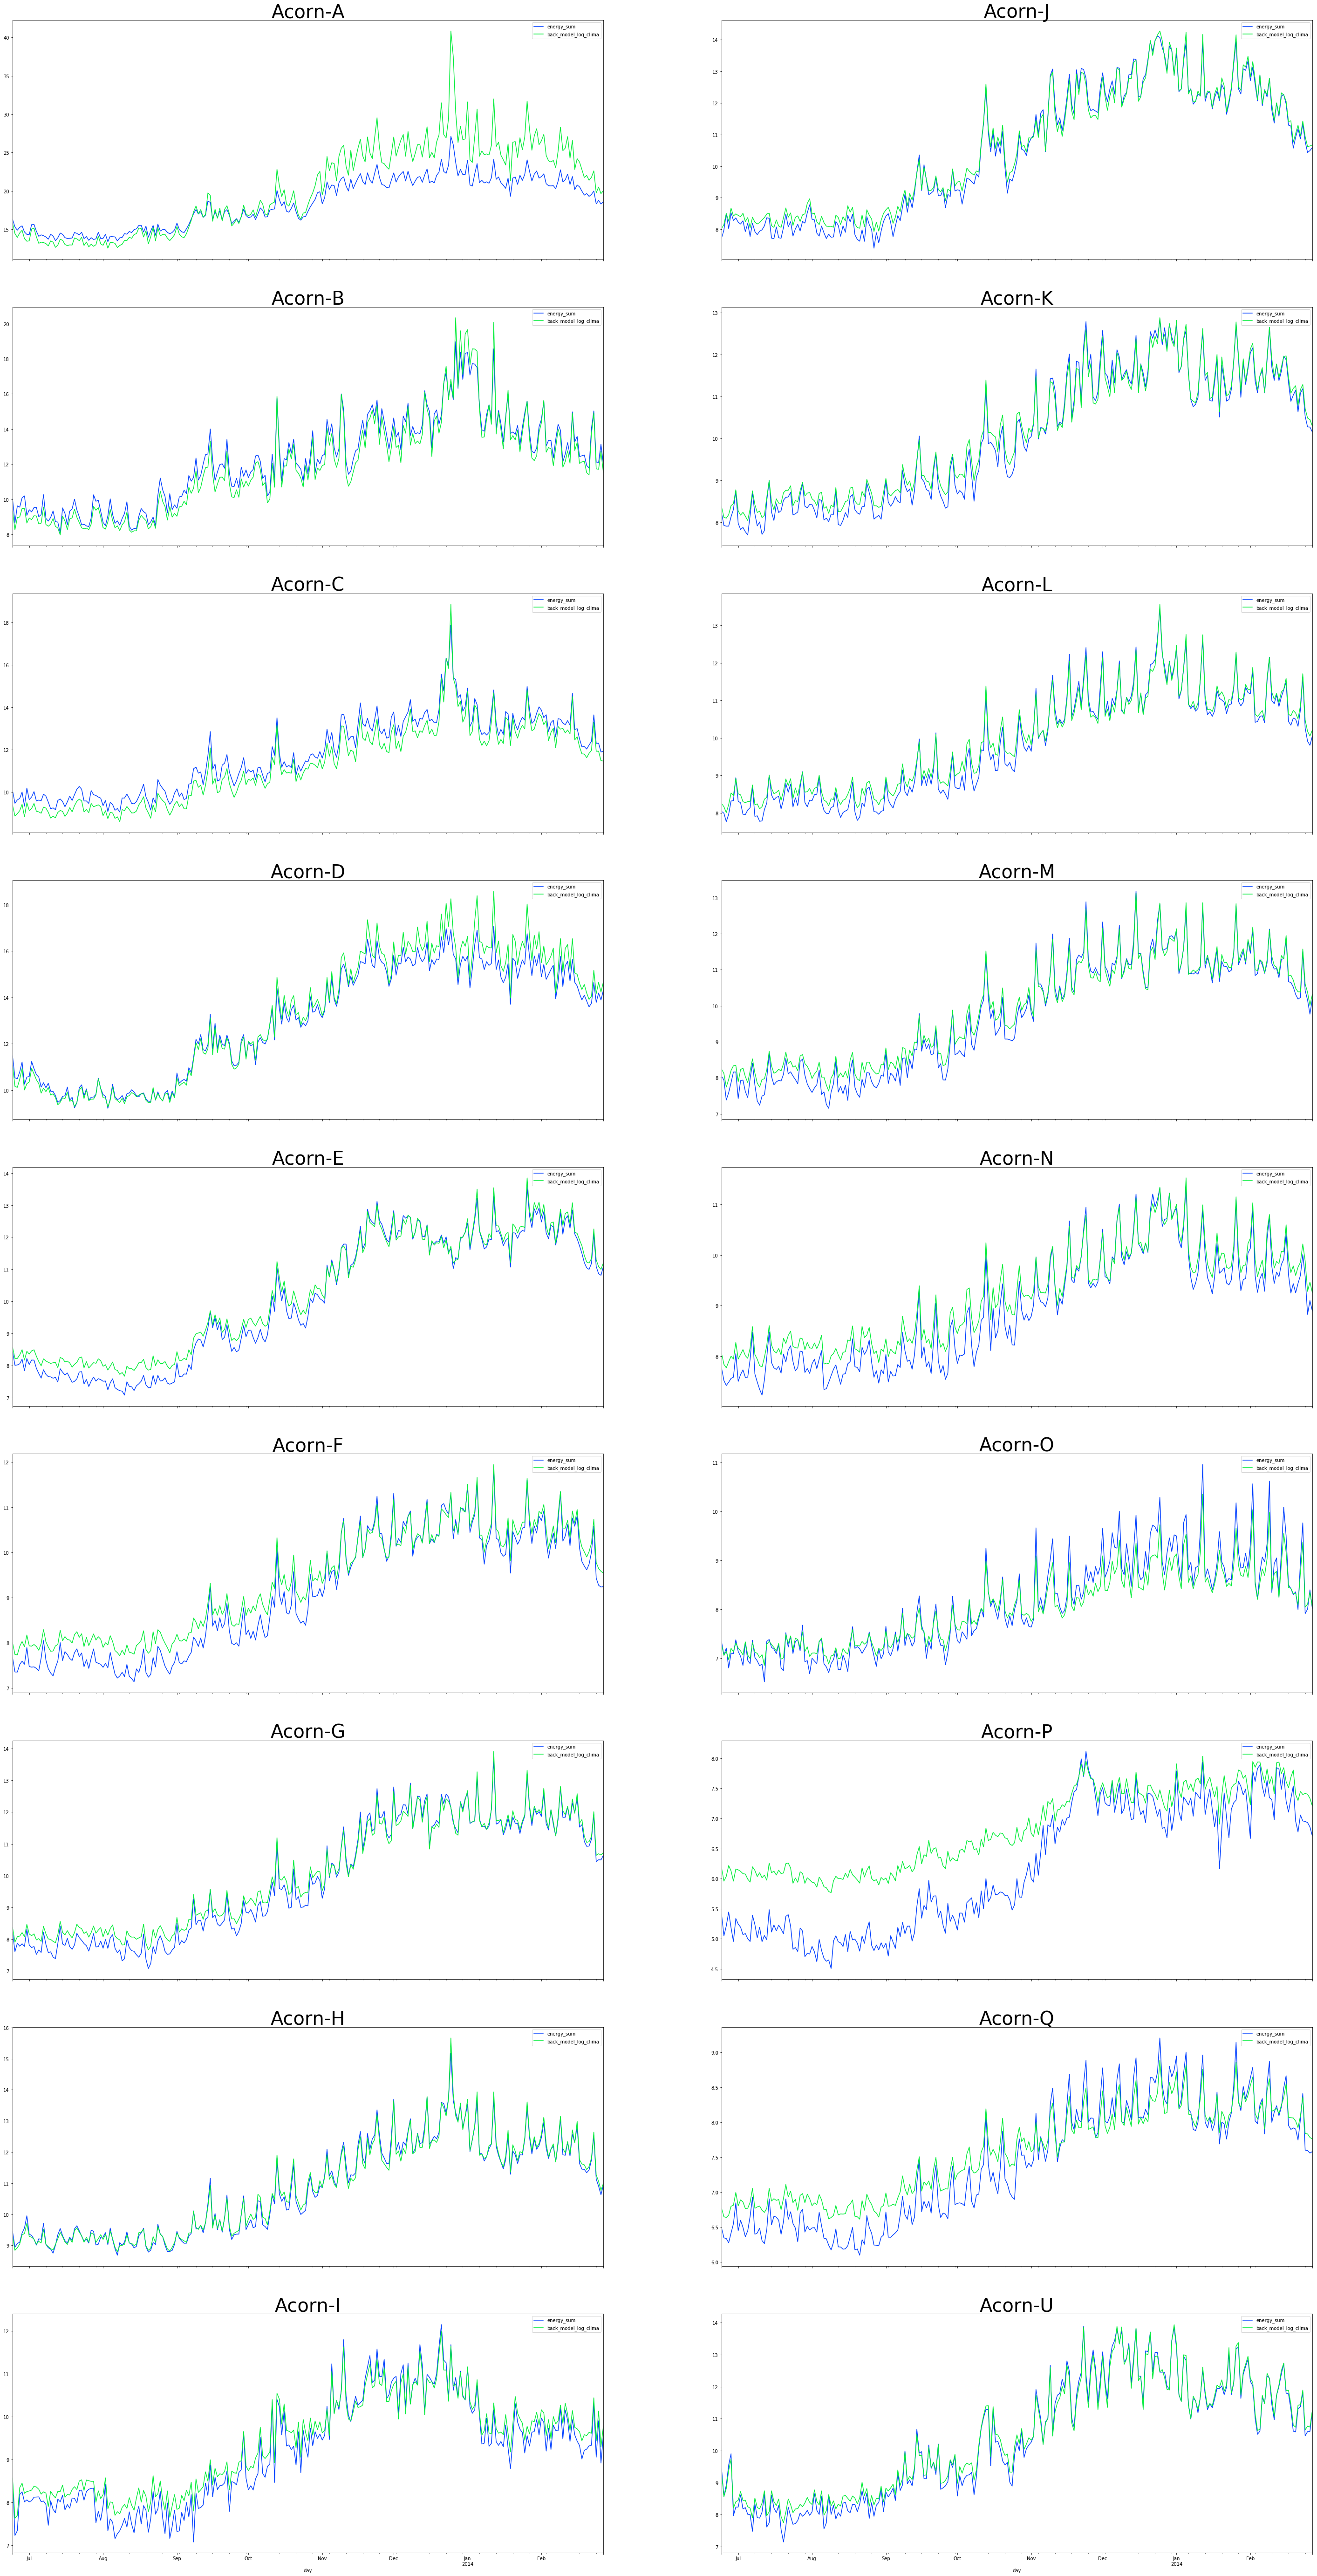

In [131]:
f, a = plt.subplots(9,2, figsize=(50,100), sharex=True)
df_panel_test.xs('ACORN-D').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'] ,ax=a[3,0], title='Acorn-D')
a[3,0].title.set_size(40)
df_panel_test.xs('ACORN-F').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[5,0],title='Acorn-F')
a[5,0].title.set_size(40)
df_panel_test.xs('ACORN-E').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[4,0],title='Acorn-E')
a[4,0].title.set_size(40)
df_panel_test.xs('ACORN-G').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[6,0],title='Acorn-G')
a[6,0].title.set_size(40)
df_panel_test.xs('ACORN-Q').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[7,1],title='Acorn-Q')
a[7,1].title.set_size(40)
df_panel_test.xs('ACORN-L').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[2,1],title='Acorn-L')
a[2,1].title.set_size(40)
df_panel_test.xs('ACORN-H').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[7,0],title='Acorn-H')
a[7,0].title.set_size(40)
df_panel_test.xs('ACORN-O').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[5,1],title='Acorn-O')
a[5,1].title.set_size(40)
df_panel_test.xs('ACORN-K').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[1,1],title='Acorn-K')
a[1,1].title.set_size(40)
df_panel_test.xs('ACORN-A').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[0,0],title='Acorn-A')
a[0,0].title.set_size(40)
df_panel_test.xs('ACORN-C').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[2,0],title='Acorn-C')
a[2,0].title.set_size(40)
df_panel_test.xs('ACORN-U').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[8,1],title='Acorn-U')
a[8,1].title.set_size(40)
df_panel_test.xs('ACORN-J').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[0,1],title='Acorn-J')
a[0,1].title.set_size(40)
df_panel_test.xs('ACORN-P').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[6,1],title='Acorn-P')
a[6,1].title.set_size(40)
df_panel_test.xs('ACORN-N').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'] ,ax=a[4,1],title='Acorn-N')
a[4,1].title.set_size(40)
df_panel_test.xs('ACORN-M').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[3,1],title='Acorn-M')
a[3,1].title.set_size(40)
df_panel_test.xs('ACORN-B').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[1,0],title='Acorn-B')
a[1,0].title.set_size(40)
df_panel_test.xs('ACORN-I').plot(kind='line', y = ['energy_sum', 'back_model_log_clima'],ax=a[8,0],title='Acorn-I')
a[8,0].title.set_size(40);



In [132]:
train_table_final = pd.pivot_table(df_panel_train, values=['energy_sum',\
                        'temperatureMean','apparentTemperatureMin',"apparent_temperatureMean",\
                        'humidity','visibility','cloudCover','pressure',\
                         'uvIndex','dewPoint','back_model_log_clima'], index=['day'],
                    aggfunc={'energy_sum':'mean','temperatureMean':'mean',\
                        'humidity':'mean','visibility':'mean','cloudCover':'mean',\
                        "apparent_temperatureMean":'mean','pressure':'mean',\
                        'uvIndex':'mean','dewPoint':'mean','apparentTemperatureMin':'mean','back_model_log_clima':np.mean })

In [133]:
test_table_final = pd.pivot_table(df_panel_test, values=['energy_sum',\
                        'temperatureMean','apparentTemperatureMin',"apparent_temperatureMean",\
                        'humidity','visibility','cloudCover','pressure',\
                         'uvIndex','dewPoint','back_model_log_clima'], index=['day'],
                    aggfunc={'energy_sum':'mean','temperatureMean':'mean',\
                        'humidity':'mean','visibility':'mean','cloudCover':'mean',\
                        "apparent_temperatureMean":'mean','pressure':'mean',\
                        'uvIndex':'mean','dewPoint':'mean','apparentTemperatureMin':'mean','back_model_log_clima':np.mean })

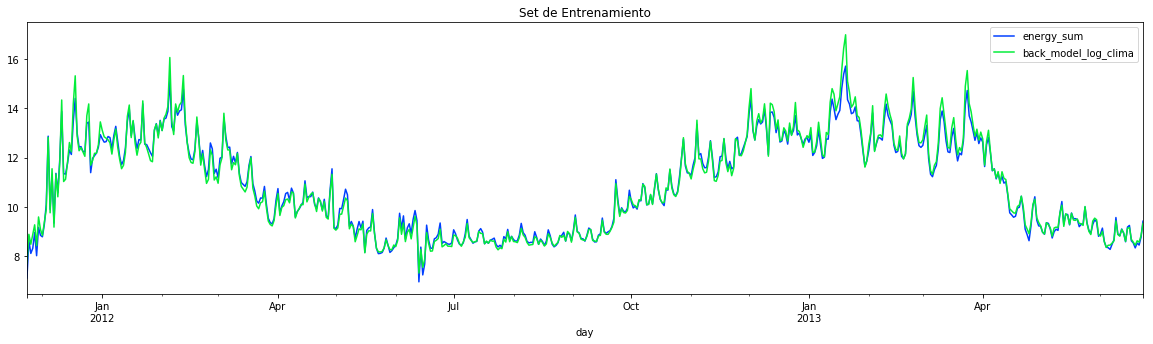

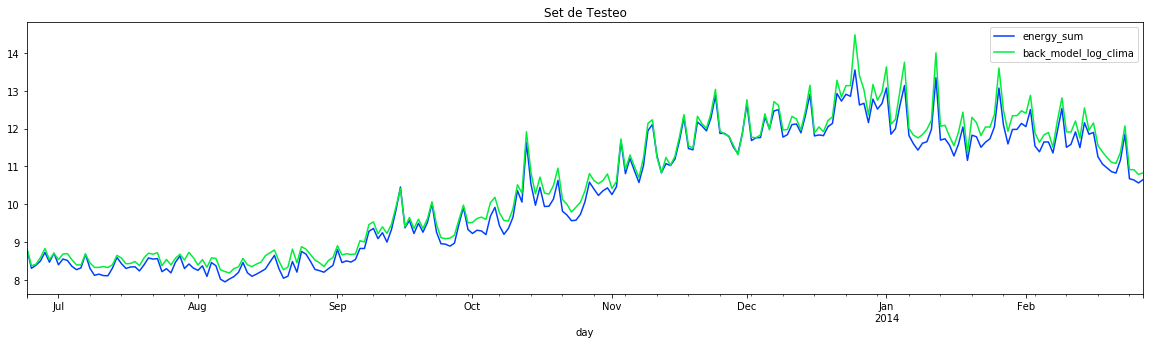

In [134]:
train_table_final.plot(kind = "line", y = ['energy_sum', 'back_model_log_clima'],figsize=(20,5), title='Set de Entrenamiento');
test_table_final.plot(kind = "line", y = ['energy_sum', 'back_model_log_clima'],figsize=(20,5), title='Set de Testeo');

In [135]:
df_Results.loc[6, "Model"] = "Panel"
df_Results.loc[6, "RMSE"] = RMSE(test_table_final['back_model_log_clima'], test_table_final['energy_sum'])
df_Results.loc[6,"R2"] = r2_score( test_table_final['energy_sum'], test_table_final['back_model_log_clima'])
df_Results

Model      RMSE        R2
0                                     Linear   1.68338 -0.149072
1                                 Transf Log   1.67298 -0.134916
2                         Transf Log + Month  0.970193  0.618322
3                   Transf Log + Month + Day  0.944494  0.638274
4         Transf Log + Month + Day + Weather  0.481693  0.905915
5  Log Model + Month + Day + Weather + ARIMA  0.467491  0.911381
6                                      Panel  0.246516   0.97664

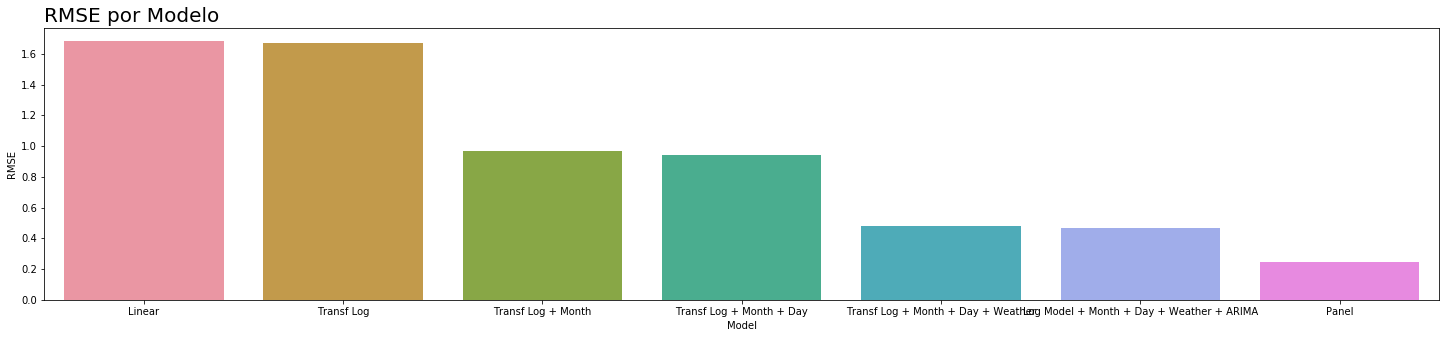

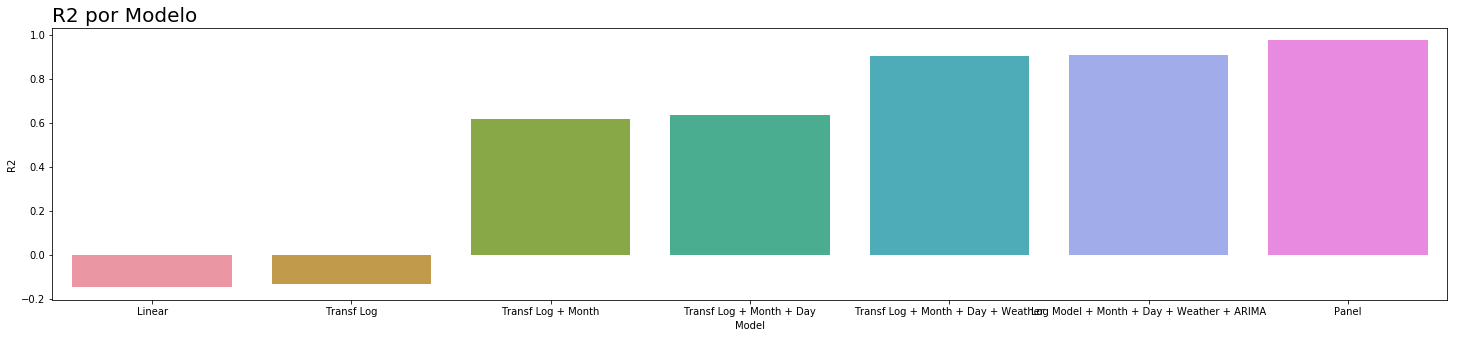

In [136]:
plt.figure(figsize=(25,5))
plt.title('RMSE por Modelo', size=20, loc='left')
sns.barplot(x='Model',y='RMSE', data=df_Results);
plt.figure(figsize=(25,5))
plt.title('R2 por Modelo', size=20, loc='left')
sns.barplot(x='Model',y='R2', data=df_Results);

## Muchas gracias por su atención!

#### Si la primera parte les interesó, los invitamos a continuar profundizando en la sección 2 de nuestro informe: "Análisis de Demanda Puntual"